<a href="https://colab.research.google.com/github/tivanello/fase2/blob/main/notebooks/Ajustado_TECH_CHALLENGE_FASE_02_Eduardo_Gil_Tivanello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você foi recentemente alocado em uma equipe de cientistas de dados de um grande fundo de investimentos brasileiro. Sua missão inicial é desenvolver um modelo preditivo capaz de prever se o índice IBOVESPA vai fechar em alta ou baixa no dia seguinte, com base em dados históricos do próprio índice. Esse modelo será usado como insumo para alimentar dashboards internos de tomada de decisão dos analistas quantitativos da empresa.
# Dados
Utilize os dados históricos do índice IBOVESPA, disponíveis publicamente: https://br.investing.com/indices/bovespa-historical-data

# Requisitos:
• Selecione o período “diário”.
• Baixe um intervalo de pelo menos 2 anos de dados.
• Realize o pré-processamento necessário para utilizar os dados no
modelo.

# Objetivo
Criar um modelo que preveja se o fechamento do IBOVESPA do dia seguinte será maior ou menor que o do dia atual, ou seja: Seu modelo deve prever a tendência (↑ ou ↓) com acuracidade mínima de 75% em um conjunto de teste. O conjunto de testes deverá conter o último mês (30 dias) de dados disponíveis.

# Entregas Esperadas
Você deverá apresentar ao time de investimentos:
Storytelling Técnico
Apresentação com os seguintes requisitos:
• Aquisição e exploração dos dados;
• Estratégia de engenharia de atributos, caso seja realizado (por exemplo: variações, médias móveis, etc)
• Preparação da base para previsão (definição de target, janela de tempo, etc.);
• Escolha e justificativa do modelo utilizado;
• Resultados e análise de métricas que garantem que o modelo está confiável;

# Justificativa Técnica
Explique claramente:
• Por que você escolheu o(s) modelo(s) utilizados (ex: árvores, regressão logística, LSTM, etc.);
• Como tratou a natureza sequencial dos dados (ex: janelas deslizantes, features lagged);
• Quais os trade-offs entre acuracidade e overfitting.

#Quais documentos devo subir na plataforma? As entregas deverão conter necessariamente:
• Uma pasta zip contendo todos os arquivos do projeto, ou um link para o repositório do GitHub com seu projeto.
• Apresentação do storytelling. Pode ser em PPT, PDF ou ferramentas da sua preferência, como o CANVAS, por exemplo.
• Vídeo de no máximo 5 (cinco) minutos, com uma visão gerencial, explicando como interpretar os resultados obtidos. Note que é necessário que todos os membros do grupo apareçam no vídeo.

**Dica: Utilize o maior intervalo de tempo possível para atingir maior  acuracidade no modelo preditivo.**

Lembre-se que você poderá apresentar o desenvolvimento do seu projeto durante as lives e grupos de estudo com os(as) docentes. Essas são ótimas oportunidades para discutir sobre as dificuldades encontradas, além de pegar dicas valiosas com especialistas e colegas de turma. Não se esqueça que isso é um entregável obrigatório! Se atente para o prazo de entrega até o final da fase.

**Importação dos arquivos.**

 tentei importar toda a série histórica, à partir de 01/08/1994,  porém o arquivo vinha apenas até 10/10/2014. Como solução realizei a importação de  dois arquivos e realizada junção dos dois nas linhas de comando abaixo. Iremos trabalhar com o arquivo com a série hitórica de 01/08/1994 até 01/08/2025

In [194]:
import pandas as pd

# Caminho do arquivo CSV
arquivo1 = '/content/drive/MyDrive/Pos Data Analytics/Fase 2 - Machine Learning and Time Series/Desafio/Dados Históricos - Ibovespa 11-10-2014 01-08-2025.csv'
arquivo2 = '/content/drive/MyDrive/Pos Data Analytics/Fase 2 - Machine Learning and Time Series/Desafio/Dados Históricos - Ibovespa 1994 10-10-2014.csv'

# Carrega os arquivos com tratamento de separadores decimais
df1 = pd.read_csv(arquivo1, thousands='.', decimal=',')
df2 = pd.read_csv(arquivo2, thousands='.', decimal=',')

# Unifica os dados
df_ibovespa = pd.concat([df1, df2], ignore_index=True)






In [195]:
# Visualização das primeiras linhas
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,1082025,132644,132920,133237,132571,"4,88M","-0,32%"
1,31072025,133071,133987,133987,132096,"9,20B","-0,69%"
2,30072025,133990,132702,134368,131883,"8,66B","0,95%"
3,29072025,132726,132130,133346,132130,"6,32B","0,45%"
4,28072025,132129,133538,133902,131550,"6,63B","-1,04%"


Alterar os nomes das colunas retirando o maiusculo e acentuação e Vol. para volume e Var% para variacao. Será necessário instalar a biblioteca unicode ( biblioteca Python que remove acentos e caracteres especiais, convertendo textos para versões ASCII simples)


In [196]:
!pip install unidecode

In [197]:
import unidecode

# Renomeia colunas: remove acentos e converte para minúsculas
df_ibovespa.columns = [unidecode.unidecode(col).lower().replace('vol.', 'volume').replace('var%', 'variacao') for col in df_ibovespa.columns]

# Visualiza o novo nome das colunas
print(df_ibovespa.columns)

Index(['data', 'ultimo', 'abertura', 'maxima', 'minima', 'volume', 'variacao'], dtype='object')


In [198]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao
0,1082025,132644,132920,133237,132571,"4,88M","-0,32%"
1,31072025,133071,133987,133987,132096,"9,20B","-0,69%"
2,30072025,133990,132702,134368,131883,"8,66B","0,95%"
3,29072025,132726,132130,133346,132130,"6,32B","0,45%"
4,28072025,132129,133538,133902,131550,"6,63B","-1,04%"


Analisando o arquivo notei que a data não esta no formato correto, sendo necessária a sua formação


In [199]:
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   data      7679 non-null   int64 
 1   ultimo    7679 non-null   int64 
 2   abertura  7679 non-null   int64 
 3   maxima    7679 non-null   int64 
 4   minima    7679 non-null   int64 
 5   volume    7678 non-null   object
 6   variacao  7679 non-null   object
dtypes: int64(5), object(2)
memory usage: 420.1+ KB


In [200]:
# Verifica se há avlores Nulos

df_ibovespa[df_ibovespa["volume"].isnull()]

,data,ultimo,abertura,maxima,minima,volume,variacao
2354,10022016,40377,40592,40592,39960,NaN,"-0,53%"


In [201]:
# Corrige a coluna 'data' para string de 8 dígitos (DDMMYYYY)

df_ibovespa['data'] = df_ibovespa['data'].astype(str).str.zfill(8)
df_ibovespa['data'] = pd.to_datetime(df_ibovespa['data'], format='%d%m%Y')

# Ordena por data
df_ibovespa = df_ibovespa.sort_values(by='data').reset_index(drop=True)



In [202]:
# 2) Converter variacao (texto) -> número
df_ibovespa["variacao_num"] = (
    df_ibovespa["variacao"].astype(str)
        .str.replace("%", "", regex=False)
        .str.replace(".", "", regex=False)
        .str.replace(",", ".", regex=False)
        .astype(float) / 100.0
)




In [203]:
# função para converter o dados da coluna volume em valor
def converter_volume(valor):
    if isinstance(valor, str):
        valor = valor.replace(',', '.').strip()
        if valor.endswith('K'):
            return float(valor.replace('K', '')) * 1e3
        elif valor.endswith('M'):
            return float(valor.replace('M', '')) * 1e6
        elif valor.endswith('B'):
            return float(valor.replace('B', '')) * 1e9
        else:
            return float(valor)
    return valor  # já numérico

# Aplicar a função
df_ibovespa['volume'] = df_ibovespa['volume'].apply(converter_volume)

# Preencher valores ausentes com o valor da linha anterior
df_ibovespa['volume'] = df_ibovespa['volume'].fillna(method='ffill')


/tmp/ipython-input-3680603689.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ibovespa['volume'] = df_ibovespa['volume'].fillna(method='ffill')


In [204]:
#Converter colunas para float64
colunas_float = ['ultimo', 'abertura', 'maxima', 'minima']
df_ibovespa[colunas_float] = df_ibovespa[colunas_float].astype(float)

In [205]:
# Garantir ordem e unicidade por data (evita target quebrado por duplicidade)
df_ibovespa["data"] = pd.to_datetime(df_ibovespa["data"], errors="coerce", dayfirst=True)

df_ibovespa = (
    df_ibovespa
    .dropna(subset=["data"])
    .sort_values("data")
    .drop_duplicates(subset=["data"], keep="last")
    .reset_index(drop=True)
)

print("Linhas:", len(df_ibovespa))
print("Datas duplicadas:", df_ibovespa["data"].duplicated().sum())
print("Data min/max:", df_ibovespa["data"].min(), df_ibovespa["data"].max())


Linhas: 7679
Datas duplicadas: 0
Data min/max: 1994-08-01 00:00:00 2025-08-01 00:00:00


In [206]:
df_ibovespa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data          7679 non-null   datetime64[ns]
 1   ultimo        7679 non-null   float64       
 2   abertura      7679 non-null   float64       
 3   maxima        7679 non-null   float64       
 4   minima        7679 non-null   float64       
 5   volume        7679 non-null   float64       
 6   variacao      7679 non-null   object        
 7   variacao_num  7679 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 480.1+ KB


In [207]:
df_ibovespa.tail()

,data,ultimo,abertura,maxima,minima,volume,variacao,variacao_num
7674,2025-07-28,132129.0,133538.0,133902.0,131550.0,6.630000e+09,"-1,04%",-0.0104
7675,2025-07-29,132726.0,132130.0,133346.0,132130.0,6.320000e+09,"0,45%",0.0045
7676,2025-07-30,133990.0,132702.0,134368.0,131883.0,8.660000e+09,"0,95%",0.0095
7677,2025-07-31,133071.0,133987.0,133987.0,132096.0,9.200000e+09,"-0,69%",-0.0069
7678,2025-08-01,132644.0,132920.0,133237.0,132571.0,4.880000e+06,"-0,32%",-0.0032


In [208]:
df_ibovespa.head()

,data,ultimo,abertura,maxima,minima,volume,variacao,variacao_num
0,1994-08-01,4152.0,4201.0,4223.0,4091.0,5.390000e+09,"-1,17%",-0.0117
1,1994-08-02,4311.0,4152.0,4311.0,4152.0,6.630000e+09,"3,83%",0.0383
2,1994-08-03,4392.0,4311.0,4426.0,4275.0,6.880000e+09,"1,88%",0.0188
3,1994-08-04,4355.0,4392.0,4406.0,4321.0,5.670000e+09,"-0,84%",-0.0084
4,1994-08-05,4470.0,4355.0,4476.0,4329.0,5.140000e+09,"2,64%",0.0264


In [209]:
df_ibovespa.isnull().sum()

,0
data,0
ultimo,0
abertura,0
maxima,0
minima,0
volume,0
variacao,0
variacao_num,0


Necessidade de criar a minha variável de tendência, onde:

1 = O fechamento do IBOVESPA no dia seguinte será maior que o de hoje (alta)

0 = O fechamento do IBOVESPA no dia seguinte será igual ou menor que o de hoje (sem alta)

In [210]:
# Criao meu target - Tendência

import numpy as np

# Criar a variável target com base no fechamento (ultimo)
prox = df_ibovespa["ultimo"].shift(-1)

df_ibovespa["tendencia"] = np.where(
    prox.notna(),
    (prox > df_ibovespa["ultimo"]).astype(int),
    np.nan
)

# Remover a última linha (que fica sem target válido)
df_ibovespa = df_ibovespa.dropna(subset=["tendencia"]).copy()
df_ibovespa["tendencia"] = df_ibovespa["tendencia"].astype(int)





In [211]:
df_ibovespa.tail()

,data,ultimo,abertura,maxima,minima,volume,variacao,variacao_num,tendencia
7673,2025-07-25,133524.0,133820.0,134204.0,133285.0,5.560000e+09,"-0,21%",-0.0021,0
7674,2025-07-28,132129.0,133538.0,133902.0,131550.0,6.630000e+09,"-1,04%",-0.0104,1
7675,2025-07-29,132726.0,132130.0,133346.0,132130.0,6.320000e+09,"0,45%",0.0045,1
7676,2025-07-30,133990.0,132702.0,134368.0,131883.0,8.660000e+09,"0,95%",0.0095,0
7677,2025-07-31,133071.0,133987.0,133987.0,132096.0,9.200000e+09,"-0,69%",-0.0069,0


## Estratégia de Engenharia de Atributos (Features) — IBOVESPA

A ideia das features abaixo é transformar o “preço puro” (**ultimo**) em sinais de **tendência, força do movimento, risco/instabilidade, padrão de candle, volume e sazonalidade**.  
Todas as variáveis foram construídas **usando apenas informações do passado (até o dia t)**, sem olhar o futuro.

---

**1) Retornos (variação percentual do preço)**  
Medem quanto o preço mudou em janelas curtas. São bons para capturar **momento**.

- **retorno_1d**: variação percentual de 1 dia (**pct_change(1)**). Representa o comportamento **de ontem para hoje**.
- **retorno_3d**: variação percentual acumulada em 3 dias (**pct_change(3)**). Representa tendência de **curtíssimo prazo**.
- **retorno_7d**: variação percentual acumulada em 7 dias (**pct_change(7)**). Representa sinal de tendência **semanal**.

---

**2) Médias móveis (suavização do preço)**  
Servem para reduzir ruído do preço diário e enxergar a direção geral em janelas curtas.

- **media_movel_3**: média do fechamento (**ultimo**) dos últimos **3 pregões** (**rolling(window=3).mean()**). Suaviza ruídos de curtíssimo prazo.
- **media_movel_7**: média do fechamento (**ultimo**) dos últimos **7 pregões** (**rolling(window=7).mean()**). Mostra direção geral da semana (tendência curta).

---

**3) Volatilidade (instabilidade / risco)**  
Volatilidade aqui é o **desvio padrão** do fechamento em janelas curtas: quanto mais alto, mais instável.

- **volatilidade_3d**: desvio padrão do fechamento (**ultimo**) nos últimos **3 pregões** (**rolling(window=3).std()**). Mede instabilidade **muito recente**.
- **volatilidade_7d**: desvio padrão do fechamento (**ultimo**) nos últimos **7 pregões** (**rolling(window=7).std()**). Mede instabilidade **semanal**.

---

**4) RSI (Relative Strength Index) — força do movimento**  
Mede a velocidade/força do movimento recente (0 a 100). Ajuda a captar **sobrecompra/sobrevenda**.

- **rsi_14**: RSI com janela de **14 dias** (**RSIIndicator(close=ultimo, window=14).rsi()**). Em geral:  
  - RSI > 70 sugere **sobrecompra** (pode perder força / possível reversão)  
  - RSI < 30 sugere **sobrevenda** (pode reagir / possível reversão)

---

**5) MACD (12-26-9) — tendência por médias exponenciais**  
Indicador de tendência baseado na diferença entre médias móveis exponenciais. Ajuda a identificar **mudança de direção**.

- **macd**: linha principal do MACD (**EMA12 − EMA26**). Positivo costuma indicar tendência de **alta**; negativo, **baixa**.
- **macd_signal**: linha de sinal (**EMA9 do macd**). Cruzamentos com **macd** indicam possíveis mudanças de tendência.
- **macd_diff**: histograma (**macd − macd_signal**). Mostra a **força** do sinal: quanto maior o valor absoluto, maior a “convicção”.

---

**6) Distância do preço para as médias (tendência relativa)**  
Mostra se o preço está “esticado” para cima/baixo em relação à média. Útil para detectar **afastamento** e possíveis correções.

- **dist_mm_3**: distância percentual do preço para a média móvel de 3 dias (**(ultimo / media_movel_3) - 1**).  
  > 0: preço acima da média; < 0: abaixo.
- **dist_mm_7**: distância percentual do preço para a média móvel de 7 dias (**(ultimo / media_movel_7) - 1**).  
  Mesma lógica, mas em janela semanal.
- **cruz_mm_3_7**: relação entre médias de 3 e 7 dias (**(media_movel_3 / media_movel_7) - 1**).  
  > 0: média curta acima da semanal (tendência mais positiva); < 0: o contrário.

---

**7) Candle features (padrão do pregão em % do preço)**  
Usam **abertura**, **maxima**, **minima** e **ultimo**. Representam a “forma” do candle e capturam pressão compradora/vendedora no dia.

- **amplitude_pct**: amplitude do dia normalizada (**(maxima - minima) / ultimo**). Mede o “tamanho do dia” (volatilidade intradiária).
- **corpo_pct**: tamanho do corpo do candle (**(ultimo - abertura) / abertura**).  
  > 0: fechou acima da abertura; < 0: fechou abaixo.
- **sombra_sup_pct**: sombra superior (**(maxima - max(abertura, ultimo)) / ultimo**). Indica rejeição no topo (tentou subir e voltou).
- **sombra_inf_pct**: sombra inferior (**(min(abertura, ultimo) - minima) / ultimo**). Indica rejeição no fundo (tentou cair e voltou).

---

**8) Volume features (força do movimento)**  
Volume ajuda a diferenciar movimentos “fracos” de movimentos com maior participação do mercado.

- **volume_ret_1d**: variação percentual do volume de ontem para hoje (**volume.pct_change(1)**).
- **volume_mm_7**: média móvel de 7 dias do volume (**volume.rolling(7).mean()**). Representa o “volume típico” da semana.

---

**9) Calendário (sazonalidade)**  
Captura padrões por dia da semana e mês que às vezes aparecem em séries financeiras.

- **dow**: dia da semana (**data.dt.dayofweek**), onde 0=segunda … 4=sexta.
- **month**: mês (**data.dt.month**), de 1 a 12.

---

**Limpeza final (dropna)**  
Após criar as features, algumas linhas iniciais ficam com **NaN** por causa de **pct_change(...)**, **rolling(...)** e indicadores (RSI/MACD), que precisam de histórico.  
Por isso removemos apenas as linhas que ainda têm **NaN** nas colunas de features, garantindo uma base consistente para treino/teste.


In [212]:
!pip install ta

In [213]:
import numpy as np
import pandas as pd
import ta

# ============================================================
# FEATURES - IBOVESPA (df_ibovespa)
# ============================================================

# ============================================================
# 1) Retornos
# ============================================================
if "retorno_1d" not in df_ibovespa.columns:
    df_ibovespa["retorno_1d"] = df_ibovespa["ultimo"].pct_change(1)

if "retorno_3d" not in df_ibovespa.columns:
    df_ibovespa["retorno_3d"] = df_ibovespa["ultimo"].pct_change(3)

if "retorno_7d" not in df_ibovespa.columns:
    df_ibovespa["retorno_7d"] = df_ibovespa["ultimo"].pct_change(7)

# ============================================================
# 2) Médias móveis
# ============================================================
if "media_movel_3" not in df_ibovespa.columns:
    df_ibovespa["media_movel_3"] = df_ibovespa["ultimo"].rolling(window=3).mean()

if "media_movel_7" not in df_ibovespa.columns:
    df_ibovespa["media_movel_7"] = df_ibovespa["ultimo"].rolling(window=7).mean()

# ============================================================
# 3) Volatilidade
# ============================================================
if "volatilidade_3d" not in df_ibovespa.columns:
    df_ibovespa["volatilidade_3d"] = df_ibovespa["ultimo"].rolling(window=3).std()

if "volatilidade_7d" not in df_ibovespa.columns:
    df_ibovespa["volatilidade_7d"] = df_ibovespa["ultimo"].rolling(window=7).std()

# ============================================================
# 4) Indicadores técnicos (RSI + MACD)
# ============================================================
if "rsi_14" not in df_ibovespa.columns:
    df_ibovespa["rsi_14"] = ta.momentum.RSIIndicator(
        close=df_ibovespa["ultimo"], window=14
    ).rsi()

# ============================================================
# 5) MACD (12-26-9)
# ===========================================================

if not all(c in df_ibovespa.columns for c in ["macd", "macd_signal", "macd_diff"]):
    macd = ta.trend.MACD(close=df_ibovespa["ultimo"])
    df_ibovespa["macd"] = macd.macd()
    df_ibovespa["macd_signal"] = macd.macd_signal()
    df_ibovespa["macd_diff"] = macd.macd_diff()

# ============================================================
# 6) Distância do preço para as médias (tendência relativa)
# ============================================================

df_ibovespa["dist_mm_3"] = (df_ibovespa["ultimo"] / df_ibovespa["media_movel_3"]) - 1
df_ibovespa["dist_mm_7"] = (df_ibovespa["ultimo"] / df_ibovespa["media_movel_7"]) - 1
df_ibovespa["cruz_mm_3_7"] = (df_ibovespa["media_movel_3"] / df_ibovespa["media_movel_7"]) - 1

# ============================================================
# 7) Candle features (usa abertura/máxima/mínima/fechamento=ultimo)
# Tudo em % do preço (normalizado)
# ============================================================

if all(c in df_ibovespa.columns for c in ["abertura", "maxima", "minima", "ultimo"]):
    df_ibovespa["amplitude_pct"] = (df_ibovespa["maxima"] - df_ibovespa["minima"]) / df_ibovespa["ultimo"]
    df_ibovespa["corpo_pct"] = (df_ibovespa["ultimo"] - df_ibovespa["abertura"]) / df_ibovespa["abertura"]

    topo = df_ibovespa[["abertura", "ultimo"]].max(axis=1)
    fundo = df_ibovespa[["abertura", "ultimo"]].min(axis=1)

    df_ibovespa["sombra_sup_pct"] = (df_ibovespa["maxima"] - topo) / df_ibovespa["ultimo"]
    df_ibovespa["sombra_inf_pct"] = (fundo - df_ibovespa["minima"]) / df_ibovespa["ultimo"]

# ============================================================
# 8) Volume features
# ============================================================
if "volume" in df_ibovespa.columns:
    df_ibovespa["volume_ret_1d"] = df_ibovespa["volume"].pct_change(1)
    df_ibovespa["volume_mm_7"] = df_ibovespa["volume"].rolling(7).mean()

# ============================================================
# 9) Calendário
# ============================================================

df_ibovespa["dow"] = df_ibovespa["data"].dt.dayofweek
df_ibovespa["month"] = df_ibovespa["data"].dt.month

# ============================================================
# LIMPEZA FINAL: remover NaNs gerados por rolling/shift/indicadores
# (limpa apenas o necessário: todas as colunas de features)
# ============================================================

features_cols = [
    "retorno_1d","retorno_3d","retorno_7d",
    "media_movel_3","media_movel_7",
    "volatilidade_3d","volatilidade_7d",
    "rsi_14","macd","macd_signal","macd_diff",
    "dist_mm_3","dist_mm_7","cruz_mm_3_7",
    "amplitude_pct","corpo_pct","sombra_sup_pct","sombra_inf_pct",
    "volume_ret_1d","volume_mm_7",
    "dow","month",
    "variacao_num",
]

# mantém só as que existem (se alguma coluna não existir no df)
features_cols = [c for c in features_cols if c in df_ibovespa.columns]

df_ibovespa = df_ibovespa.dropna(subset=features_cols).copy()

print("OK - Features prontas.")
print("Qtd linhas:", len(df_ibovespa))
print("Qtd features:", len(features_cols))
print("Features:", features_cols)


OK - Features prontas.
Qtd linhas: 7645
Qtd features: 23
Features: ['retorno_1d', 'retorno_3d', 'retorno_7d', 'media_movel_3', 'media_movel_7', 'volatilidade_3d', 'volatilidade_7d', 'rsi_14', 'macd', 'macd_signal', 'macd_diff', 'dist_mm_3', 'dist_mm_7', 'cruz_mm_3_7', 'amplitude_pct', 'corpo_pct', 'sombra_sup_pct', 'sombra_inf_pct', 'volume_ret_1d', 'volume_mm_7', 'dow', 'month', 'variacao_num']


Verificar se as minhas novas variáveis foram criadas

In [214]:
print(df_ibovespa.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7645 entries, 33 to 7677
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             7645 non-null   datetime64[ns]
 1   ultimo           7645 non-null   float64       
 2   abertura         7645 non-null   float64       
 3   maxima           7645 non-null   float64       
 4   minima           7645 non-null   float64       
 5   volume           7645 non-null   float64       
 6   variacao         7645 non-null   object        
 7   variacao_num     7645 non-null   float64       
 8   tendencia        7645 non-null   int64         
 9   retorno_1d       7645 non-null   float64       
 10  retorno_3d       7645 non-null   float64       
 11  retorno_7d       7645 non-null   float64       
 12  media_movel_3    7645 non-null   float64       
 13  media_movel_7    7645 non-null   float64       
 14  volatilidade_3d  7645 non-null   float64    

**verificar estatísticas básicas**, valores extremos e possíveis erros visíveis

In [215]:
df_ibovespa.describe()

,data,ultimo,abertura,maxima,minima,volume,variacao_num,tendencia,retorno_1d,retorno_3d,...,dist_mm_7,cruz_mm_3_7,amplitude_pct,corpo_pct,sombra_sup_pct,sombra_inf_pct,volume_ret_1d,volume_mm_7,dow,month
count,7645,7645.00000,7645.000000,7645.000000,7645.000000,7.645000e+03,7645.000000,7645.000000,7645.000000,7645.000000,...,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7.645000e+03,7645.000000,7645.000000
mean,2010-02-27 22:15:05.062132224,53152.86985,53137.320340,53657.213473,52624.846697,1.670445e+09,0.000621,0.520863,0.000621,0.001854,...,0.001387,0.000854,0.023181,0.000560,0.004665,0.004934,0.242173,1.671649e+09,1.997253,6.501112
min,1994-09-16 00:00:00,2138.00000,2138.000000,2449.000000,2110.000000,1.121000e+05,-0.158100,0.000000,-0.158090,-0.254273,...,-0.221818,-0.136526,0.003243,-0.157792,-0.009768,-0.017899,-0.981334,8.392529e+05,0.000000,1.000000
25%,2002-06-17 00:00:00,14779.00000,14761.000000,14925.000000,14524.000000,3.610000e+06,-0.009100,0.000000,-0.009112,-0.015163,...,-0.011624,-0.007893,0.013926,-0.009134,0.000447,0.000298,-0.164884,3.598571e+06,1.000000,4.000000
50%,2010-03-03 00:00:00,51902.00000,51867.000000,52494.000000,51377.000000,1.146000e+07,0.000800,1.000000,0.000827,0.002384,...,0.002408,0.001596,0.019219,0.000743,0.002953,0.003110,-0.006766,1.154143e+07,2.000000,7.000000
75%,2017-11-16 00:00:00,73367.00000,73268.000000,74254.000000,72390.000000,2.825600e+08,0.010800,1.000000,0.010836,0.019851,...,0.016328,0.010640,0.027210,0.010675,0.006850,0.006777,0.188474,2.943400e+08,3.000000,9.000000
max,2025-07-31 00:00:00,141264.00000,141265.000000,141564.000000,140597.000000,5.406000e+10,0.334200,1.000000,0.334190,0.459561,...,0.202603,0.136696,0.294205,0.338956,0.081065,0.119939,1146.574819,2.069857e+10,4.000000,12.000000
std,NaN,38482.59470,38475.048537,38754.716942,38200.301214,3.995644e+09,0.020048,0.499597,0.020048,0.034682,...,0.026346,0.017339,0.016397,0.019939,0.005701,0.006776,13.147891,3.786638e+09,1.411294,3.419311


Verificação de valores ausentes

In [216]:
print(df_ibovespa.isnull().sum())

data               0
ultimo             0
abertura           0
maxima             0
minima             0
volume             0
variacao           0
variacao_num       0
tendencia          0
retorno_1d         0
retorno_3d         0
retorno_7d         0
media_movel_3      0
media_movel_7      0
volatilidade_3d    0
volatilidade_7d    0
rsi_14             0
macd               0
macd_signal        0
macd_diff          0
dist_mm_3          0
dist_mm_7          0
cruz_mm_3_7        0
amplitude_pct      0
corpo_pct          0
sombra_sup_pct     0
sombra_inf_pct     0
volume_ret_1d      0
volume_mm_7        0
dow                0
month              0
dtype: int64


**Análisar do balanceamento da variável alvo (tendencia)**


In [217]:
df_ibovespa['tendencia'].value_counts(normalize=True)


,proportion
tendencia,
1,0.520863
0,0.479137


Sem desbalanceamento preocupante no conjunto completo (52% vs. 48%);

Isso aumenta a confiança do modelo que pode aprender padrões sem precisar de balanceamento artificial, desde que a divisão entre treino e teste também esteja proporcional.

In [218]:
# Separação últimos 30 registros do final da série (em ordem)

df_ibovespa = df_ibovespa.sort_values("data").reset_index(drop=True)

df_teste = df_ibovespa.tail(30).copy()

# Garantir que o target existe no teste

df_teste = df_teste[df_teste["tendencia"].notna()].copy()

print("Linhas no teste:", len(df_teste))
print("Período do teste:", df_teste["data"].min(), "até", df_teste["data"].max())

# Verificar balanceamento no teste
df_teste["tendencia"].value_counts(normalize=True)



Linhas no teste: 30
Período do teste: 2025-06-20 00:00:00 até 2025-07-31 00:00:00


,proportion
tendencia,
0,0.6
1,0.4


In [219]:
df_teste.head()

,data,ultimo,abertura,maxima,minima,volume,variacao,variacao_num,tendencia,retorno_1d,...,dist_mm_7,cruz_mm_3_7,amplitude_pct,corpo_pct,sombra_sup_pct,sombra_inf_pct,volume_ret_1d,volume_mm_7,dow,month
7615,2025-06-20,137116.0,138715.0,138719.0,136815.0,1.129000e+10,"-1,15%",-0.0115,0,-0.011541,...,-0.006478,0.001553,0.013886,-0.011527,0.000029,0.002195,0.356971,8.590000e+09,4,6
7616,2025-06-23,136551.0,137116.0,137130.0,135835.0,7.730000e+09,"-0,41%",-0.0041,1,-0.004121,...,-0.009980,-0.003380,0.009484,-0.004121,0.000103,0.005243,-0.315323,8.441429e+09,0,6
7617,2025-06-24,137165.0,136552.0,138156.0,136254.0,8.080000e+09,"0,45%",0.0045,0,0.004496,...,-0.004874,-0.006478,0.013867,0.004489,0.007225,0.002173,0.045278,8.578571e+09,1,6
7618,2025-06-25,135767.0,137163.0,137163.0,135565.0,7.710000e+09,"-1,02%",-0.0102,1,-0.010192,...,-0.013538,-0.008254,0.011770,-0.010178,0.000000,0.001488,-0.045792,8.447143e+09,2,6
7619,2025-06-26,137114.0,135767.0,137353.0,135756.0,8.020000e+09,"0,99%",0.0099,0,0.009921,...,-0.001531,-0.004677,0.011647,0.009921,0.001743,0.000080,0.040208,8.504286e+09,3,6


In [220]:
# ============================================================
# Split temporal: df_treino (histórico) e df_teste (últimos 30 dias)
# ============================================================

# Ordena pela data (crescente)
df_ibovespa = df_ibovespa.sort_values("data").reset_index(drop=True)

df_teste  = df_ibovespa.tail(31)
df_teste  = df_teste[df_teste["tendencia"].notna()].tail(30).copy()
df_treino = df_ibovespa.iloc[:-len(df_teste)].copy()

print("Linhas df_treino:", len(df_treino))
print("Linhas df_teste:", len(df_teste))
print("Período teste:", df_teste["data"].min(), "até", df_teste["data"].max())






Linhas df_treino: 7615
Linhas df_teste: 30
Período teste: 2025-06-20 00:00:00 até 2025-07-31 00:00:00


In [221]:
df_ibovespa = df_ibovespa.sort_values("data").reset_index(drop=True).copy()

df_treino = df_ibovespa.iloc[:-30].copy()
df_teste  = df_ibovespa.iloc[-30:].copy()

print(df_teste["tendencia"].value_counts(normalize=True))



tendencia
0    0.6
1    0.4
Name: proportion, dtype: float64


In [222]:
df_ibovespa.describe()

,data,ultimo,abertura,maxima,minima,volume,variacao_num,tendencia,retorno_1d,retorno_3d,...,dist_mm_7,cruz_mm_3_7,amplitude_pct,corpo_pct,sombra_sup_pct,sombra_inf_pct,volume_ret_1d,volume_mm_7,dow,month
count,7645,7645.00000,7645.000000,7645.000000,7645.000000,7.645000e+03,7645.000000,7645.000000,7645.000000,7645.000000,...,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7.645000e+03,7645.000000,7645.000000
mean,2010-02-27 22:15:05.062132224,53152.86985,53137.320340,53657.213473,52624.846697,1.670445e+09,0.000621,0.520863,0.000621,0.001854,...,0.001387,0.000854,0.023181,0.000560,0.004665,0.004934,0.242173,1.671649e+09,1.997253,6.501112
min,1994-09-16 00:00:00,2138.00000,2138.000000,2449.000000,2110.000000,1.121000e+05,-0.158100,0.000000,-0.158090,-0.254273,...,-0.221818,-0.136526,0.003243,-0.157792,-0.009768,-0.017899,-0.981334,8.392529e+05,0.000000,1.000000
25%,2002-06-17 00:00:00,14779.00000,14761.000000,14925.000000,14524.000000,3.610000e+06,-0.009100,0.000000,-0.009112,-0.015163,...,-0.011624,-0.007893,0.013926,-0.009134,0.000447,0.000298,-0.164884,3.598571e+06,1.000000,4.000000
50%,2010-03-03 00:00:00,51902.00000,51867.000000,52494.000000,51377.000000,1.146000e+07,0.000800,1.000000,0.000827,0.002384,...,0.002408,0.001596,0.019219,0.000743,0.002953,0.003110,-0.006766,1.154143e+07,2.000000,7.000000
75%,2017-11-16 00:00:00,73367.00000,73268.000000,74254.000000,72390.000000,2.825600e+08,0.010800,1.000000,0.010836,0.019851,...,0.016328,0.010640,0.027210,0.010675,0.006850,0.006777,0.188474,2.943400e+08,3.000000,9.000000
max,2025-07-31 00:00:00,141264.00000,141265.000000,141564.000000,140597.000000,5.406000e+10,0.334200,1.000000,0.334190,0.459561,...,0.202603,0.136696,0.294205,0.338956,0.081065,0.119939,1146.574819,2.069857e+10,4.000000,12.000000
std,NaN,38482.59470,38475.048537,38754.716942,38200.301214,3.995644e+09,0.020048,0.499597,0.020048,0.034682,...,0.026346,0.017339,0.016397,0.019939,0.005701,0.006776,13.147891,3.786638e+09,1.411294,3.419311


In [223]:
# Lista apenas as variáveis preditoras
colunas_features = [
    # Retornos
    "retorno_1d", "retorno_3d", "retorno_7d",

    # Médias móveis
    "media_movel_3", "media_movel_7",

    # Volatilidade
    "volatilidade_3d", "volatilidade_7d",

    # Indicadores técnicos
    "rsi_14", "macd", "macd_signal", "macd_diff",

    # Distância para médias (tendência relativa)
    "dist_mm_3", "dist_mm_7", "cruz_mm_3_7",

    # Candle features (se existirem abertura/maxima/minima)
    "amplitude_pct", "corpo_pct", "sombra_sup_pct", "sombra_inf_pct",

    # Volume (se existir coluna volume)
    "volume_ret_1d", "volume_mm_7",

    # Calendário
    "dow", "month",

    # Variação numérica (se existir variacao)
    "variacao_num",
]


# Descrever estatísticas com mais percentis
df_ibovespa[colunas_features].describe(percentiles=[.01, .25, .5, .75, .99])


,retorno_1d,retorno_3d,retorno_7d,media_movel_3,media_movel_7,volatilidade_3d,volatilidade_7d,rsi_14,macd,macd_signal,...,cruz_mm_3_7,amplitude_pct,corpo_pct,sombra_sup_pct,sombra_inf_pct,volume_ret_1d,volume_mm_7,dow,month,variacao_num
count,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,...,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7.645000e+03,7645.000000,7645.000000,7645.000000
mean,0.000621,0.001854,0.004189,53136.123392,53102.736915,532.240745,785.942328,52.796160,120.130401,120.736134,...,0.000854,0.023181,0.000560,0.004665,0.004934,0.242173,1.671649e+09,1.997253,6.501112,0.000621
std,0.020048,0.034682,0.049434,38470.639217,38449.433933,530.756822,683.738467,12.237942,1059.234305,1002.358839,...,0.017339,0.016397,0.019939,0.005701,0.006776,13.147891,3.786638e+09,1.411294,3.419311,0.020048
min,-0.158090,-0.254273,-0.335406,2372.333333,2618.428571,3.055050,14.005101,13.245486,-12092.405368,-10303.426794,...,-0.136526,0.003243,-0.157792,-0.009768,-0.017899,-0.981334,8.392529e+05,0.000000,1.000000,-0.158100
1%,-0.051747,-0.096900,-0.134997,3797.133333,3797.382857,19.147496,51.901088,25.681702,-2586.273060,-2436.441712,...,-0.052798,0.006369,-0.052010,0.000000,0.000000,-0.638486,1.207452e+06,0.000000,1.000000,-0.051736
25%,-0.009112,-0.015163,-0.022324,14712.000000,14704.000000,170.642902,300.743444,43.847157,-308.738512,-288.988713,...,-0.007893,0.013926,-0.009134,0.000447,0.000298,-0.164884,3.598571e+06,1.000000,4.000000,-0.009100
50%,0.000827,0.002384,0.005382,51905.333333,51980.571429,382.089431,645.715071,52.703164,99.682084,102.760286,...,0.001596,0.019219,0.000743,0.002953,0.003110,-0.006766,1.154143e+07,2.000000,7.000000,0.000800
75%,0.010836,0.019851,0.032240,73176.000000,73079.428571,739.358506,1068.047729,61.916191,611.143428,588.799178,...,0.010640,0.027210,0.010675,0.006850,0.006777,0.188474,2.943400e+08,3.000000,9.000000,0.010800
99%,0.050979,0.090355,0.123893,134526.840000,134548.782857,2255.118011,2966.184407,79.292925,2766.499605,2613.964664,...,0.042722,0.088447,0.051077,0.024512,0.031700,1.955635,1.398429e+10,4.000000,12.000000,0.050956
max,0.334190,0.459561,0.511766,140560.666667,139777.142857,9945.164269,11770.815506,87.526295,4184.425241,3476.717814,...,0.136696,0.294205,0.338956,0.081065,0.119939,1146.574819,2.069857e+10,4.000000,12.000000,0.334200


**Análise da correlação entre as variáveis**

In [224]:
# 1) Correlação no TREINO (Pearson)
df_corr_p = df_treino[colunas_features + ["tendencia"]].corr(method="pearson")
print("\nPearson (TREINO) - correlação com tendencia:")
print(df_corr_p["tendencia"].sort_values(ascending=False))

# 2) Correlação no TREINO (Spearman)
df_corr_s = df_treino[colunas_features + ["tendencia"]].corr(method="spearman")
print("\nSpearman (TREINO) - correlação com tendencia:")
print(df_corr_s["tendencia"].sort_values(ascending=False))




Pearson (TREINO) - correlação com tendencia:
tendencia          1.000000
volatilidade_3d    0.019105
volume_mm_7        0.014235
month              0.010647
amplitude_pct      0.008688
volatilidade_7d    0.007904
rsi_14             0.006408
macd               0.002323
macd_signal        0.001956
macd_diff          0.001636
corpo_pct         -0.002140
retorno_1d        -0.002162
variacao_num      -0.002179
dist_mm_3         -0.006621
sombra_inf_pct    -0.007034
sombra_sup_pct    -0.008526
media_movel_7     -0.010138
media_movel_3     -0.010518
volume_ret_1d     -0.010853
dow               -0.015098
retorno_3d        -0.017634
retorno_7d        -0.020294
dist_mm_7         -0.023462
cruz_mm_3_7       -0.030331
Name: tendencia, dtype: float64

Spearman (TREINO) - correlação com tendencia:
tendencia          1.000000
amplitude_pct      0.014526
volume_mm_7        0.012829
macd_signal        0.011861
rsi_14             0.010737
month              0.010694
macd               0.009277
volatil

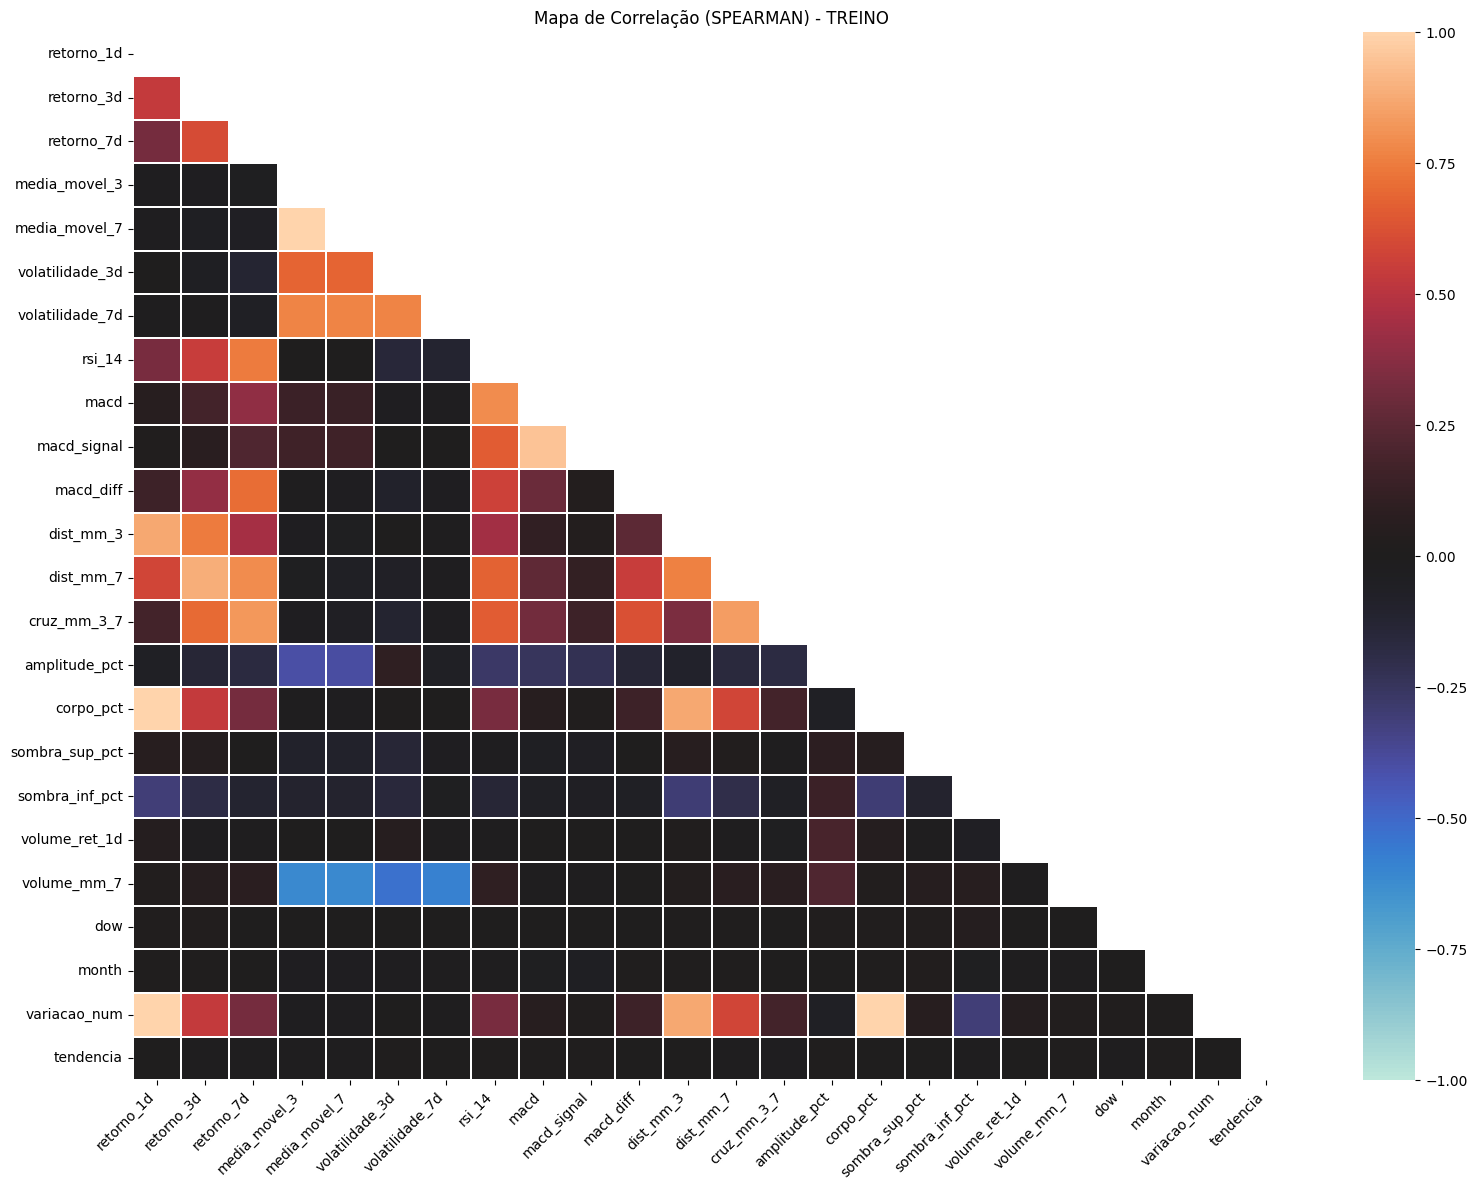

In [225]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Garantir split temporal antes (ex.: últimos 30 dias teste)
df_ibovespa = df_ibovespa.sort_values("data").reset_index(drop=True).copy()
df_treino = df_ibovespa.iloc[:-30].copy()

# 2) Corr (escolha o método: "pearson" ou "spearman")
metodo = "spearman"   # recomendo começar com spearman
df_corr = df_treino[colunas_features + ["tendencia"]].corr(method=metodo)

# 3) Mostrar só metade da matriz (evita duplicação)
mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(
    df_corr,
    mask=mask,
    annot=False,
    linewidths=0.3,
    vmin=-1, vmax=1,
    center=0
)
plt.title(f"Mapa de Correlação ({metodo.upper()}) - TREINO")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



## Avaliação do Mapa de Correlação (SPEARMAN) — TREINO

O gráfico está adequado para o objetivo: **entender relações entre variáveis preditoras** e reduzir redundância.

### O que o gráfico mostra (na prática)

1) **A variável alvo (tendencia) tem correlação baixa com quase todas as features**  
Isso é comum em séries financeiras: o sinal de “amanhã sobe ou desce” tende a ser **fraco** e frequentemente **não-linear**.  
Conclusão: correlação raramente “explica” o target, mas ajuda a identificar **features duplicadas**.

2) **Há redundância clara entre grupos de variáveis**
O mapa evidencia blocos de variáveis que carregam informação parecida:
- **Retornos** (**pct_change(1)**, **pct_change(3)**, **pct_change(7)**) tendem a se correlacionar entre si.
- **Médias móveis** (**rolling(window=3).mean()**, **rolling(window=7).mean()**) e **distâncias para médias** (**(ultimo / media_movel_3) - 1**, **(ultimo / media_movel_7) - 1**, **(media_movel_3 / media_movel_7) - 1**) também formam um bloco (mesma ideia em formatos diferentes).
- **MACD** (**EMA12 − EMA26**), **macd_signal** (**EMA9 do macd**) e **macd_diff** (**macd − macd_signal**) são derivados do mesmo indicador e, por isso, correlacionam entre si.
- **Features de candle** (**amplitude_pct**, **corpo_pct**, **sombra_sup_pct**, **sombra_inf_pct**) têm relação parcial entre si (todas vêm do mesmo pregão).

Impacto típico de manter tudo junto:
- pouca informação nova (muita repetição)
- mais ruído para o modelo
- maior instabilidade de performance

3) **Spearman é apropriado**
Spearman captura relação **monotônica**, não apenas linear. Em séries financeiras costuma ser mais útil do que Pearson.

---

## Por que usar um “triângulo” no heatmap

### 1) A matriz de correlação é simétrica
A correlação de A com B é igual à correlação de B com A.  
Ou seja, metade do gráfico é repetição. Mostrar apenas um triângulo:
- reduz duplicação
- deixa o gráfico mais limpo
- facilita enxergar blocos de redundância

### 2) Correlação calculada apenas no TREINO
O cálculo no conjunto de treino evita “olhar” o período de teste ao decidir quais features manter ou remover.  
Isso preserva a separação correta:
- TREINO: análise/seleção/ajuste
- TESTE: avaliação final

---

## Ações práticas com base no mapa

A estratégia mais segura é manter **um representante por bloco**, por exemplo:
- Retornos: manter 1 (ex.: **retorno_3d**) e testar se os demais agregam.
- Médias/distâncias: manter **media_movel_7** OU **dist_mm_7** (não os dois) e avaliar.
- MACD: manter só **macd_diff** (primeiro teste), pois costuma concentrar o sinal do cruzamento.
- Candle: manter 1–2 (ex.: **corpo_pct** e **amplitude_pct**).
- Volume: manter **volume_mm_7** e testar se **volume.pct_change(1)** agrega ou só adiciona ruído.
- Calendário: manter **dow**; **month** pode ser testada, mas geralmente tem efeito fraco.

A meta não é “mais colunas”, é **colunas diferentes**, com menos repetição.


## **Implementando as ações práticas com base no mapa de correlação**

O mapa de correlação (Spearman) foi usado para identificar **redundâncias** entre as variáveis (features) e montar conjuntos mais enxutos.  
Em séries financeiras, muitas features carregam a mesma informação com nomes diferentes (ex.: retornos parecidos entre si, médias móveis e distâncias para médias, MACD e derivados). Isso pode aumentar ruído e piorar a generalização.

### Objetivo
Comparar o desempenho de um modelo (Random Forest) usando:
1) um conjunto **enxuto** (um representante por “bloco” de informação),
2) um conjunto **enxuto + algumas variáveis extras** (testes de ganho),
3) o conjunto **completo** (todas as features criadas).

### Por que usar apenas o TREINO para análise e o TESTE para avaliar
A seleção/ajuste deve ser feita com base no TREINO para evitar “olhar” o futuro.  
O TESTE fica reservado para medir o desempenho final.

### Split temporal adotado
Foi utilizado holdout temporal:
- **Treino:** todos os registros, exceto os últimos 30 pregões
- **Teste:** últimos 30 pregões

Isso simula o cenário real: treinar com o passado e prever o futuro.

### Métricas avaliadas
- **Accuracy:** acerto total (pode enganar se as classes estiverem desbalanceadas)
- **Balanced Accuracy:** média do recall das classes (mais justa em desbalanceamento)
- **ROC AUC:** capacidade de separação do modelo (independe do threshold 0.5)

### Estratégia de features (um representante por bloco)
- Retornos: manter 1 retorno e testar os demais
- Médias/distâncias: manter apenas um (média OU distância)
- MACD: manter apenas **macd_diff**
- Candle: manter 1–2 variáveis
- Volume: manter **volume_mm_7** e testar **volume.pct_change(1)**
- Calendário: manter **dow** e testar **month** se necessário

A meta não é ter mais colunas. É ter colunas **diferentes**, com menos repetição.


In [226]:
# Implementando as ações práticas com base no mapa de correlação

import numpy as np
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score,
    classification_report, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier

def avaliar_modelo(df_train, df_test, features, nome="modelo", otimizar_threshold=False):
    feats = [f for f in features if f in df_train.columns and f in df_test.columns]

    X_train = df_train[feats].copy()
    y_train = df_train["tendencia"].copy()
    X_test  = df_test[feats].copy()
    y_test  = df_test["tendencia"].copy()

    # limpar NaNs
    train = X_train.join(y_train).dropna()
    test  = X_test.join(y_test).dropna()
    X_train, y_train = train[feats], train["tendencia"]
    X_test,  y_test  = test[feats],  test["tendencia"]

    # Random Forest "regularizado" (menos overfitting)
    modelo = RandomForestClassifier(
        n_estimators=1200,
        random_state=42,
        class_weight="balanced_subsample",
        max_depth=6,
        min_samples_leaf=20,
        min_samples_split=40,
        max_features="sqrt"
    )
    modelo.fit(X_train, y_train)

    proba_train = modelo.predict_proba(X_train)[:, 1]
    proba_test  = modelo.predict_proba(X_test)[:, 1]

    th_usado = 0.5

    # (opcional) otimizar threshold com trava
    if otimizar_threshold:
        ths = np.arange(0.30, 0.71, 0.01)
        melhor_th, melhor_bal = 0.5, -1

        for th in ths:
            pred_train = (proba_train >= th).astype(int)
            if len(np.unique(pred_train)) < 2:
                continue
            bal = balanced_accuracy_score(y_train, pred_train)
            if bal > melhor_bal:
                melhor_bal = bal
                melhor_th = th

        th_usado = melhor_th

    pred = (proba_test >= th_usado).astype(int)

    acc = accuracy_score(y_test, pred)
    bal = balanced_accuracy_score(y_test, pred)
    auc = roc_auc_score(y_test, proba_test)

    print("\n" + "="*60)
    print(f"{nome} | feats={len(feats)} | th={th_usado:.2f} | acc={acc:.4f} | bal_acc={bal:.4f} | auc={auc:.4f}")
    print("CM:\n", confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred, digits=4, zero_division=0))

    return {
        "modelo": nome,
        "n_feats": len(feats),
        "th": th_usado,
        "acc": acc,
        "bal_acc": bal,
        "auc": auc,
        "features": feats
    }



# ============================================================
# 1) Conjunto ENXUTO (um representante por bloco)
# ============================================================
features_lean = [
    # Retorno (1 representante)
    "retorno_3d",

    # Média OU distância (começa com 1 só)
    "dist_mm_7",          # alternativa: "media_movel_7"

    # MACD (1 representante)
    "macd_diff",

    # Candle (1-2)
    "corpo_pct",
    "amplitude_pct",

    # Volume (1 representante)
    "volume_mm_7",

    # Calendário (1)
    "dow",
]

# ============================================================
# 2) LEAN + testes de "vale a pena?"
# ============================================================
features_lean_plus = features_lean + [
    "retorno_1d",          # testar se agrega
    "volatilidade_7d",     # risco semanal
    "rsi_14",              # força do movimento
]

# ============================================================
# 3) FULL (todas as features atuais)
# ============================================================
features_full = colunas_features  # usa sua lista completa

# ============================================================
# Rodar avaliações
# ============================================================
res1 = avaliar_modelo(df_treino, df_teste, features_lean, "RF_LEAN")
res2 = avaliar_modelo(df_treino, df_teste, features_lean_plus, "RF_LEAN_PLUS")
res3 = avaliar_modelo(df_treino, df_teste, features_full, "RF_FULL")



RF_LEAN | feats=7 | th=0.50 | acc=0.5667 | bal_acc=0.5417 | auc=0.5139
CM:
 [[12  6]
 [ 7  5]]
              precision    recall  f1-score   support

           0     0.6316    0.6667    0.6486        18
           1     0.4545    0.4167    0.4348        12

    accuracy                         0.5667        30
   macro avg     0.5431    0.5417    0.5417        30
weighted avg     0.5608    0.5667    0.5631        30


RF_LEAN_PLUS | feats=10 | th=0.50 | acc=0.6333 | bal_acc=0.5833 | auc=0.5093
CM:
 [[15  3]
 [ 8  4]]
              precision    recall  f1-score   support

           0     0.6522    0.8333    0.7317        18
           1     0.5714    0.3333    0.4211        12

    accuracy                         0.6333        30
   macro avg     0.6118    0.5833    0.5764        30
weighted avg     0.6199    0.6333    0.6074        30


RF_FULL | feats=23 | th=0.50 | acc=0.5667 | bal_acc=0.5139 | auc=0.4444
CM:
 [[14  4]
 [ 9  3]]
              precision    recall  f1-score   suppo

## Avaliação dos Resultados — Random Forest Regularizado (Split Temporal: últimos 30 pregões)

Foram comparados três conjuntos de variáveis preditoras usando o mesmo split temporal (treino = passado, teste = últimos 30 pregões) e as mesmas métricas.

---

### Resultados (teste)

**RF_LEAN (7 features)**
- Accuracy: 0.5667
- Balanced Accuracy: 0.5417
- AUC: 0.5139  
Matriz de confusão:  
- TN=12, FP=6, FN=7, TP=5  
Leitura: desempenho mediano, com alguma capacidade de identificar altas (TP=5), porém com erros relevantes em ambas as classes.

**RF_LEAN_PLUS (10 features) — MELHOR**
- Accuracy: 0.6333
- Balanced Accuracy: 0.5833
- AUC: 0.5093  
Matriz de confusão:  
- TN=15, FP=3, FN=8, TP=4  
Leitura: melhor resultado geral e melhor equilíbrio entre classes (Balanced Accuracy mais alto). O modelo ficou mais forte para a classe 0 (quedas), reduzindo falsos positivos (FP=3). Ainda há dificuldade em capturar altas (TP=4), refletida no recall da classe 1.

**RF_FULL (23 features)**
- Accuracy: 0.5667
- Balanced Accuracy: 0.5139
- AUC: 0.4444  
Matriz de confusão:  
- TN=14, FP=4, FN=9, TP=3  
Leitura: apesar de accuracy semelhante ao RF_LEAN, o modelo perdeu capacidade de identificar altas (TP=3) e apresentou AUC inferior, sugerindo que o conjunto completo adicionou ruído e redundância.

---

## Conclusões

1) **O melhor conjunto foi o RF_LEAN_PLUS**, pois apresentou:
- maior **Accuracy** (0.6333)
- maior **Balanced Accuracy** (0.5833)

2) **O conjunto FULL piorou**, principalmente na classe 1 (altas) e no AUC. Isso reforça que:
- muitas features podem introduzir **redundância** e **ruído**
- um conjunto mais enxuto tende a generalizar melhor

3) **AUC ficou próximo de 0.50** em todos os casos (0.44 a 0.51), indicando que:
- a separação probabilística entre classes ainda é fraca
- a tarefa (prever direção diária) é naturalmente difícil e com sinal baixo

---

## Próximos passos recomendados

- Manter **RF_LEAN_PLUS** como modelo principal.
- Testar **otimização de threshold** (com trava para evitar prever apenas uma classe) para tentar melhorar o recall da classe 1 sem derrubar a classe 0.
- Ajustar hiperparâmetros finos do Random Forest (ex.: max_depth, min_samples_leaf) apenas em cima do conjunto LEAN_PLUS, evitando voltar ao FULL.


In [227]:
# Melhor modelo até o momento.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, confusion_matrix, classification_report

features_melhores = [
    "retorno_3d","dist_mm_7","macd_diff","corpo_pct","amplitude_pct",
    "volume_mm_7","dow","retorno_1d","volatilidade_7d","rsi_14"
]

X_train = df_treino[features_melhores].dropna()
y_train = df_treino.loc[X_train.index, "tendencia"]

X_test  = df_teste[features_melhores].dropna()
y_test  = df_teste.loc[X_test.index, "tendencia"]

rf = RandomForestClassifier(
    n_estimators=1200, random_state=42, class_weight="balanced_subsample",
    max_depth=6, min_samples_leaf=20, min_samples_split=40, max_features="sqrt"
)
rf.fit(X_train, y_train)

proba = rf.predict_proba(X_test)[:, 1]
pred  = (proba >= 0.5).astype(int)

acc = accuracy_score(y_test, pred)
bal = balanced_accuracy_score(y_test, pred)
auc = roc_auc_score(y_test, proba)

print("acc:", round(acc,4), "bal_acc:", round(bal,4), "auc:", round(auc,4))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, digits=4, zero_division=0))




acc: 0.6333 bal_acc: 0.5833 auc: 0.5093
[[15  3]
 [ 8  4]]
              precision    recall  f1-score   support

           0     0.6522    0.8333    0.7317        18
           1     0.5714    0.3333    0.4211        12

    accuracy                         0.6333        30
   macro avg     0.6118    0.5833    0.5764        30
weighted avg     0.6199    0.6333    0.6074        30



In [228]:
from datetime import timedelta
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, confusion_matrix, classification_report

   # features
features_melhores = ["retorno_3d","dist_mm_7","macd_diff","corpo_pct","amplitude_pct", "volume_mm_7","dow","retorno_1d","volatilidade_7d","rsi_14"]

def rodar_janela(anos):
    df = df_ibovespa.sort_values("data").reset_index(drop=True).copy()

    # teste = últimos 30
    df_test = df.iloc[-30:].copy()

    # treino = últimos N anos antes do teste
    data_corte = df_test["data"].min() - pd.DateOffset(years=anos)
    df_train = df[(df["data"] >= data_corte) & (df["data"] < df_test["data"].min())].copy()

    train = df_train[features_melhores + ["tendencia"]].dropna()
    test  = df_test[features_melhores + ["tendencia"]].dropna()

    X_train = train[features_melhores]
    y_train = train["tendencia"].astype(int)
    X_test  = test[features_melhores]
    y_test  = test["tendencia"].astype(int)

    modelo = RandomForestClassifier(
        n_estimators=1200,
        random_state=42,
        class_weight="balanced_subsample",
        max_depth=6,
        min_samples_leaf=20,
        min_samples_split=40,
        max_features="sqrt"
    )
    modelo.fit(X_train, y_train)

    proba = modelo.predict_proba(X_test)[:, 1]
    pred  = (proba >= 0.5).astype(int)

    acc = accuracy_score(y_test, pred)
    bal = balanced_accuracy_score(y_test, pred)
    auc = roc_auc_score(y_test, proba)

    print("\n" + "="*60)
    print(f"Janela treino: {anos} anos | acc={acc:.4f} | bal_acc={bal:.4f} | auc={auc:.4f}")
    print("CM:\n", confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred, digits=4, zero_division=0))

for anos in [2, 5, 10, 20, 30]:
    rodar_janela(anos)



Janela treino: 2 anos | acc=0.3667 | bal_acc=0.3750 | auc=0.3611
CM:
 [[ 6 12]
 [ 7  5]]
              precision    recall  f1-score   support

           0     0.4615    0.3333    0.3871        18
           1     0.2941    0.4167    0.3448        12

    accuracy                         0.3667        30
   macro avg     0.3778    0.3750    0.3660        30
weighted avg     0.3946    0.3667    0.3702        30


Janela treino: 5 anos | acc=0.5333 | bal_acc=0.5000 | auc=0.4676
CM:
 [[12  6]
 [ 8  4]]
              precision    recall  f1-score   support

           0     0.6000    0.6667    0.6316        18
           1     0.4000    0.3333    0.3636        12

    accuracy                         0.5333        30
   macro avg     0.5000    0.5000    0.4976        30
weighted avg     0.5200    0.5333    0.5244        30


Janela treino: 10 anos | acc=0.5333 | bal_acc=0.4861 | auc=0.4537
CM:
 [[13  5]
 [ 9  3]]
              precision    recall  f1-score   support

           0     0.5

### Treino por janela (threshold=0.50)
Foram testadas janelas de treino: 2, 5, 10, 20 e 30 anos.

**Melhor janela: 30 anos**
- Accuracy: **0.6667**
- Balanced Accuracy: **0.6389**
- AUC: **0.5046**

Matriz de confusão:
- TN=14 | FP=4
- FN=6  | TP=6

Leitura:
- Melhor desempenho geral e melhor equilíbrio entre classes.
- Classe 1 (alta) teve melhoria: **TP=6** (recall_1 = 0.5000).
- Resultado é o mais consistente até aqui para o conjunto de teste exigido (últimos 30 dias).



In [229]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score,
    confusion_matrix, classification_report
)

# ---------------------------
# Split: teste = últimos 30
# Treino: últimos 30 anos antes do teste
# ---------------------------
df = df_ibovespa.sort_values("data").reset_index(drop=True).copy()
df_test = df.iloc[-30:].copy()
data_ini_treino = df_test["data"].min() - pd.DateOffset(years=30)
df_train = df[(df["data"] >= data_ini_treino) & (df["data"] < df_test["data"].min())].copy()

features_melhores = ["retorno_3d","dist_mm_7","macd_diff","corpo_pct","amplitude_pct", "volume_mm_7","dow","retorno_1d","volatilidade_7d","rsi_14"]

train = df_train[features_melhores + ["tendencia"]].dropna()
test  = df_test[features_melhores + ["tendencia"]].dropna()

X_train = train[features_melhores]
y_train = train["tendencia"].astype(int)
X_test  = test[features_melhores]
y_test  = test["tendencia"].astype(int)

# modelo (o mesmo regularizado)
modelo = RandomForestClassifier(
    n_estimators=1200,
    random_state=42,
    class_weight="balanced_subsample",
    max_depth=6,
    min_samples_leaf=20,
    min_samples_split=40,
    max_features="sqrt"
)
modelo.fit(X_train, y_train)

proba_test = modelo.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, proba_test)

def avaliar_threshold(th):
    pred = (proba_test >= th).astype(int)
    acc = accuracy_score(y_test, pred)
    bal = balanced_accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    return acc, bal, cm, classification_report(y_test, pred, digits=4, zero_division=0)

for th in [0.50, 0.60]:
    acc, bal, cm, rep = avaliar_threshold(th)
    print("\n" + "="*60)
    print(f"RF_30Y | th={th:.2f} | acc={acc:.4f} | bal_acc={bal:.4f} | auc={auc:.4f}")
    print("CM:\n", cm)
    print(rep)



RF_30Y | th=0.50 | acc=0.6667 | bal_acc=0.6389 | auc=0.5046
CM:
 [[14  4]
 [ 6  6]]
              precision    recall  f1-score   support

           0     0.7000    0.7778    0.7368        18
           1     0.6000    0.5000    0.5455        12

    accuracy                         0.6667        30
   macro avg     0.6500    0.6389    0.6411        30
weighted avg     0.6600    0.6667    0.6603        30


RF_30Y | th=0.60 | acc=0.6000 | bal_acc=0.5000 | auc=0.5046
CM:
 [[18  0]
 [12  0]]
              precision    recall  f1-score   support

           0     0.6000    1.0000    0.7500        18
           1     0.0000    0.0000    0.0000        12

    accuracy                         0.6000        30
   macro avg     0.3000    0.5000    0.3750        30
weighted avg     0.3600    0.6000    0.4500        30



## Comparação de Threshold — Janela de Treino: 30 anos | Teste: últimos 30 pregões

### Modelo
Random Forest (regularizado) treinado com janela histórica de 30 anos e avaliado no último mês (30 pregões).

---

## Threshold = 0.50  ✅ (recomendado)

- Accuracy: **0.6667**
- Balanced Accuracy: **0.6389**
- AUC: **0.5046**

Matriz de confusão:
- TN=14 | FP=4
- FN=6  | TP=6

Leitura:
- O modelo mantém desempenho **equilibrado** entre as classes.
- Consegue identificar **altas** (TP=6, recall da classe 1 = 0.50) sem “chutar” tudo como alta.
- Este é o melhor resultado entre os thresholds testados.

---

## Threshold = 0.60  ❌ (descartado)

- Accuracy: **0.6000**
- Balanced Accuracy: **0.5000**
- AUC: **0.5046** (igual, porque AUC não depende do threshold)

Matriz de confusão:
- TN=18 | FP=0
- FN=12 | TP=0

Leitura:
- O modelo passou a prever **somente a classe 0 (queda)**.
- Zerou a capacidade de identificar **altas** (TP=0, recall da classe 1 = 0).
- Balanced Accuracy caiu para **0.50**, indicando desempenho equivalente a aleatório quando se considera as duas classes.

---

## Decisão
**Usar threshold = 0.50** na janela de 30 anos, pois é o único que:
- mantém acertos nas duas classes
- maximiza o equilíbrio (balanced accuracy)
- entrega a melhor performance geral no teste


## Resultado recomendado (**MELHOR MODELO ATÉ AQUI**)

**Treino por janela de 30 anos (últimos 30 pregões como teste), threshold=0.50**, pois apresentou:
- maior **Accuracy (0.6667)**
- maior **Balanced Accuracy (0.6389)**

## Próximo passo para tentar melhorar ainda mais
Aplicar **threshold com travas** também na **janela de 30 anos**, para verificar se dá para aumentar TP (altas) mantendo FP controlado.

acc: 0.6667 | bal_acc: 0.6389 | auc: 0.5046
baseline sempre 0: 0.6 | baseline sempre 1: 0.4
CM:
 [[14  4]
 [ 6  6]]
              precision    recall  f1-score   support

           0     0.7000    0.7778    0.7368        18
           1     0.6000    0.5000    0.5455        12

    accuracy                         0.6667        30
   macro avg     0.6500    0.6389    0.6411        30
weighted avg     0.6600    0.6667    0.6603        30



<Figure size 640x480 with 0 Axes>

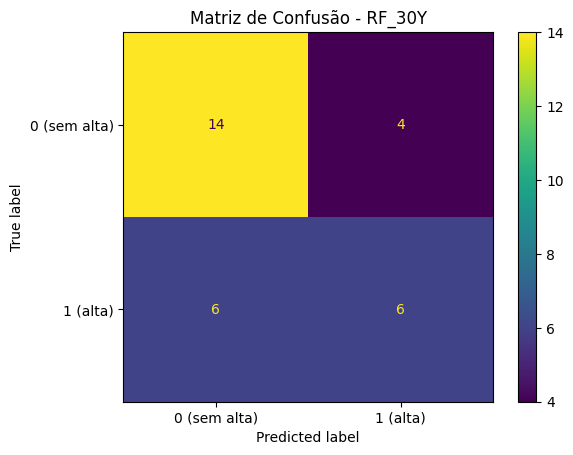

melhor th (acc): 0.5 | acc: 0.6667 | bal_acc: 0.6389


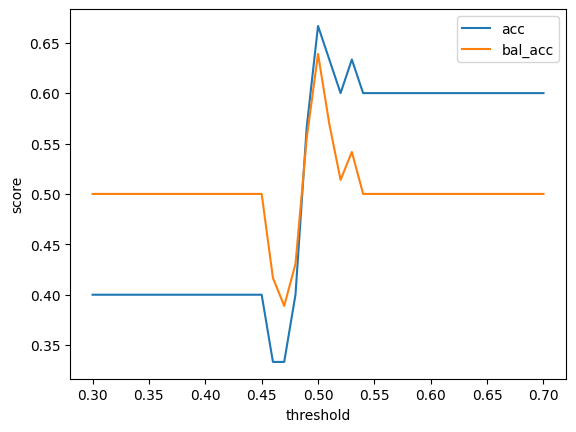

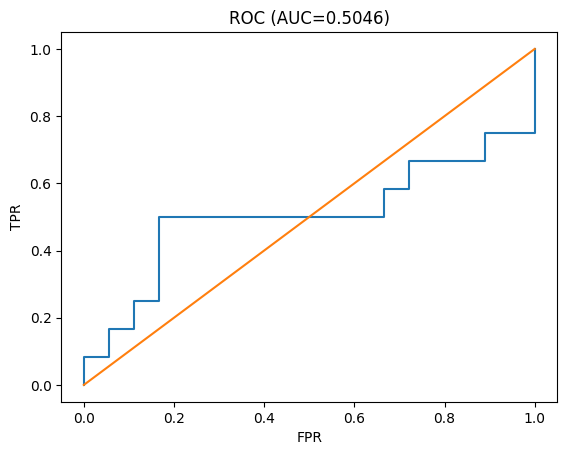


Top 10 (Permutation Importance):
           feature  imp_mean   imp_std
2        macd_diff  0.143333  0.053852
4    amplitude_pct  0.116667  0.026874
8  volatilidade_7d  0.050000  0.037268
0       retorno_3d  0.030000  0.037859
9           rsi_14  0.030000  0.023333
6              dow  0.026667  0.032660
3        corpo_pct  0.026667  0.057349
5      volume_mm_7 -0.010000  0.015275
7       retorno_1d -0.010000  0.030000
1        dist_mm_7 -0.043333  0.015275


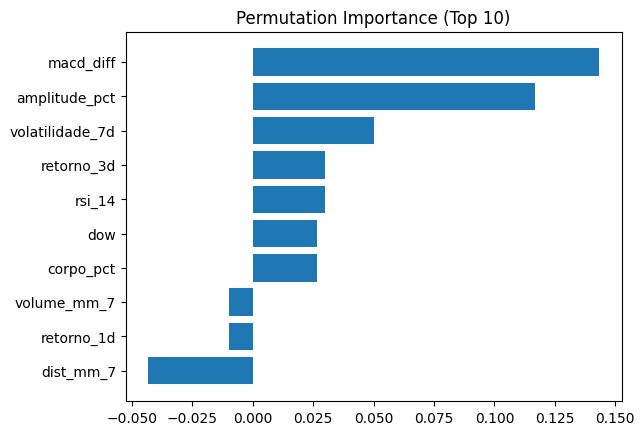

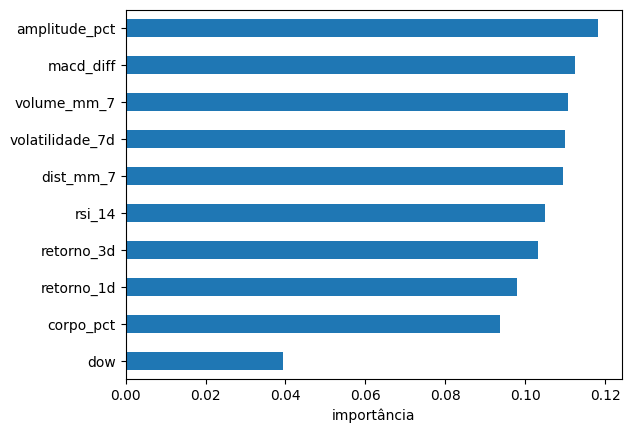


Top 10 importâncias (RF):
amplitude_pct      0.118227
macd_diff          0.112468
volume_mm_7        0.110679
volatilidade_7d    0.110079
dist_mm_7          0.109365
rsi_14             0.104905
retorno_3d         0.103223
retorno_1d         0.097926
corpo_pct          0.093627
dow                0.039503
dtype: float64


In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, ConfusionMatrixDisplay
)
from sklearn.inspection import permutation_importance

# Split: teste = últimos 30 | treino = 30 anos antes do teste
df = df_ibovespa.sort_values("data").reset_index(drop=True).copy()
df_test = df.iloc[-30:].copy()
data_ini_treino = df_test["data"].min() - pd.DateOffset(years=30)
df_train = df[(df["data"] >= data_ini_treino) & (df["data"] < df_test["data"].min())].copy()

features_melhores = ["retorno_3d","dist_mm_7","macd_diff","corpo_pct","amplitude_pct",
                    "volume_mm_7","dow","retorno_1d","volatilidade_7d","rsi_14"]

train = df_train[features_melhores + ["tendencia"]].dropna()
test  = df_test[features_melhores + ["tendencia"]].dropna()

X_train = train[features_melhores]
y_train = train["tendencia"].astype(int)
X_test  = test[features_melhores]
y_test  = test["tendencia"].astype(int)

modelo = RandomForestClassifier(
    n_estimators=1200, random_state=42, class_weight="balanced_subsample",
    max_depth=6, min_samples_leaf=20, min_samples_split=40, max_features="sqrt"
)
modelo.fit(X_train, y_train)

proba = modelo.predict_proba(X_test)[:, 1]
pred  = (proba >= 0.5).astype(int)

acc = accuracy_score(y_test, pred)
bal = balanced_accuracy_score(y_test, pred)
auc = roc_auc_score(y_test, proba)

acc_0 = accuracy_score(y_test, np.zeros_like(y_test))
acc_1 = accuracy_score(y_test, np.ones_like(y_test))

print("acc:", round(acc,4), "| bal_acc:", round(bal,4), "| auc:", round(auc,4))
print("baseline sempre 0:", round(acc_0,4), "| baseline sempre 1:", round(acc_1,4))
print("CM:\n", confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, digits=4, zero_division=0))

# Matriz de Confusão (gráfico)
plt.figure()
ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels=["0 (sem alta)", "1 (alta)"])
plt.title("Matriz de Confusão - RF_30Y")
plt.show()

# Acurácia vs threshold
ths = np.arange(0.30, 0.71, 0.01)
accs, bals = [], []
for th in ths:
    p = (proba >= th).astype(int)
    accs.append(accuracy_score(y_test, p))
    bals.append(balanced_accuracy_score(y_test, p))

best_i = int(np.argmax(accs))
print("melhor th (acc):", round(float(ths[best_i]),2), "| acc:", round(float(accs[best_i]),4), "| bal_acc:", round(float(bals[best_i]),4))

plt.figure()
plt.plot(ths, accs, label="acc")
plt.plot(ths, bals, label="bal_acc")
plt.xlabel("threshold")
plt.ylabel("score")
plt.legend()
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title(f"ROC (AUC={auc:.4f})")
plt.show()

# Permutation Importance (teste)
perm = permutation_importance(modelo, X_test, y_test, n_repeats=10, random_state=42, scoring="accuracy")
imp_df = pd.DataFrame({
    "feature": X_test.columns,
    "imp_mean": perm.importances_mean,
    "imp_std": perm.importances_std
}).sort_values("imp_mean", ascending=False)

print("\nTop 10 (Permutation Importance):")
print(imp_df.head(10))

plt.figure()
plt.barh(imp_df["feature"].head(10)[::-1], imp_df["imp_mean"].head(10)[::-1])
plt.title("Permutation Importance (Top 10)")
plt.show()

# Feature importances do RF
imp = pd.Series(modelo.feature_importances_, index=features_melhores).sort_values()
plt.figure()
imp.plot(kind="barh")
plt.xlabel("importância")
plt.show()

print("\nTop 10 importâncias (RF):")
print(imp.sort_values(ascending=False).head(10))


In [233]:
# Função para teste de modelos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report,
    ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score
)
from sklearn.inspection import permutation_importance


def avaliar_modelo(modelo, nome, df_train, df_test, features, resultados,
                   threshold=0.5, plotar=True, importancia=False, n_repeats=10, random_state=42):

    feats = [f for f in features if f in df_train.columns and f in df_test.columns]

    train = df_train[feats + ["tendencia"]].dropna()
    test  = df_test[feats + ["tendencia"]].dropna()

    X_train, y_train = train[feats], train["tendencia"].astype(int)
    X_test,  y_test  = test[feats],  test["tendencia"].astype(int)

    modelo.fit(X_train, y_train)

    # probas (se existir)
    proba = None
    if hasattr(modelo, "predict_proba"):
        proba = modelo.predict_proba(X_test)[:, 1]
        y_pred = (proba >= threshold).astype(int)
    else:
        y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    bal = balanced_accuracy_score(y_test, y_pred)
    cm  = confusion_matrix(y_test, y_pred)
    rep = classification_report(y_test, y_pred, zero_division=0, output_dict=True)

    auc = roc_auc_score(y_test, proba) if proba is not None else np.nan

    print(f"\n===== {nome} | feats={len(feats)} | th={threshold} =====")
    print("acc:", round(acc,4), "| bal_acc:", round(bal,4), "| auc:", round(float(auc),4))
    print("CM:\n", cm)
    print(classification_report(y_test, y_pred, zero_division=0))

    if plotar:
        plt.figure()
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0","1"])
        plt.title(f"CM - {nome}")
        plt.show()

        if proba is not None:
            plt.figure()
            RocCurveDisplay.from_predictions(y_test, proba)
            plt.title(f"ROC - {nome} (AUC={auc:.2f})")
            plt.show()

    if importancia:
        perm = permutation_importance(modelo, X_test, y_test, n_repeats=n_repeats, random_state=random_state, scoring="accuracy")
        imp_df = pd.DataFrame({"feature": feats, "imp_mean": perm.importances_mean}).sort_values("imp_mean", ascending=False)
        print("\nTop 10 (Permutation Importance):")
        print(imp_df.head(10))

    resultados.append({
        "modelo": nome,
        "n_feats": len(feats),
        "threshold": threshold,
        "acc": acc,
        "bal_acc": bal,
        "auc": float(auc),
        "tn": int(cm[0,0]), "fp": int(cm[0,1]), "fn": int(cm[1,0]), "tp": int(cm[1,1]),
        "precision_1": rep.get("1", {}).get("precision", np.nan),
        "recall_1": rep.get("1", {}).get("recall", np.nan),
        "f1_1": rep.get("1", {}).get("f1-score", np.nan),
        "features": feats
    })



===== RF_30Y | feats=10 | th=0.5 =====
acc: 0.6667 | bal_acc: 0.6389 | auc: 0.5046
CM:
 [[14  4]
 [ 6  6]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        18
           1       0.60      0.50      0.55        12

    accuracy                           0.67        30
   macro avg       0.65      0.64      0.64        30
weighted avg       0.66      0.67      0.66        30



<Figure size 640x480 with 0 Axes>

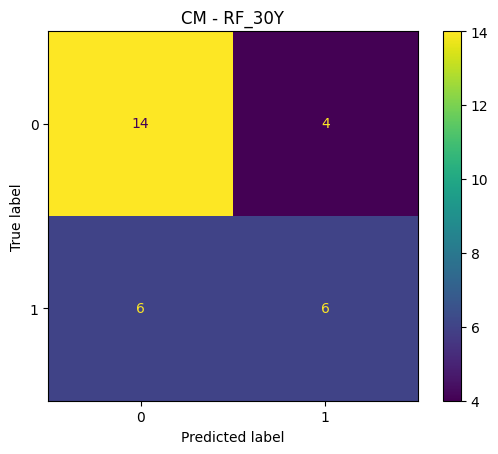

<Figure size 640x480 with 0 Axes>

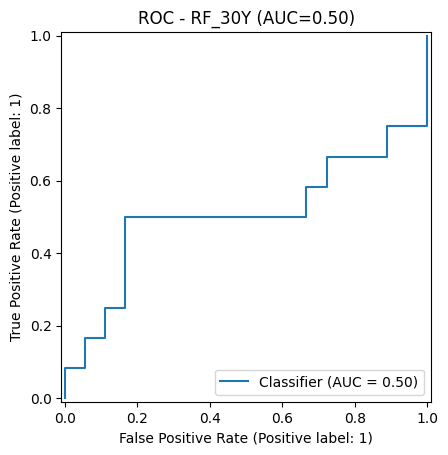


Top 10 (Permutation Importance):
           feature  imp_mean
2        macd_diff  0.143333
4    amplitude_pct  0.116667
8  volatilidade_7d  0.050000
0       retorno_3d  0.030000
9           rsi_14  0.030000
6              dow  0.026667
3        corpo_pct  0.026667
5      volume_mm_7 -0.010000
7       retorno_1d -0.010000
1        dist_mm_7 -0.043333


,modelo,n_feats,threshold,acc,bal_acc,auc,tn,fp,fn,tp,precision_1,recall_1,f1_1,features
0,RF_30Y,10,0.5,0.666667,0.638889,0.50463,14,4,6,6,0.6,0.5,0.545455,"[retorno_3d, dist_mm_7, macd_diff, corpo_pct, ..."


In [235]:
resultados = []

features_melhores = ["retorno_3d","dist_mm_7","macd_diff","corpo_pct","amplitude_pct",
                     "volume_mm_7","dow","retorno_1d","volatilidade_7d","rsi_14"]

avaliar_modelo(
    RandomForestClassifier(n_estimators=1200, random_state=42, class_weight="balanced_subsample",
                           max_depth=6, min_samples_leaf=20, min_samples_split=40, max_features="sqrt"),
    "RF_30Y",
    df_train, df_test,
    features_melhores,
    resultados,
    threshold=0.5,
    plotar=True,
    importancia=True
)

import pandas as pd

def resumo_resultados(resultados, ordenar_por="acc"):
    return pd.DataFrame(resultados).sort_values(ordenar_por, ascending=False).reset_index(drop=True)

resumo_resultados(resultados)


===== ExtraTrees | feats=10 | th=0.5 =====
acc: 0.4667 | bal_acc: 0.5417 | auc: 0.6065
CM:
 [[ 3 15]
 [ 1 11]]
              precision    recall  f1-score   support

           0       0.75      0.17      0.27        18
           1       0.42      0.92      0.58        12

    accuracy                           0.47        30
   macro avg       0.59      0.54      0.43        30
weighted avg       0.62      0.47      0.40        30



<Figure size 640x480 with 0 Axes>

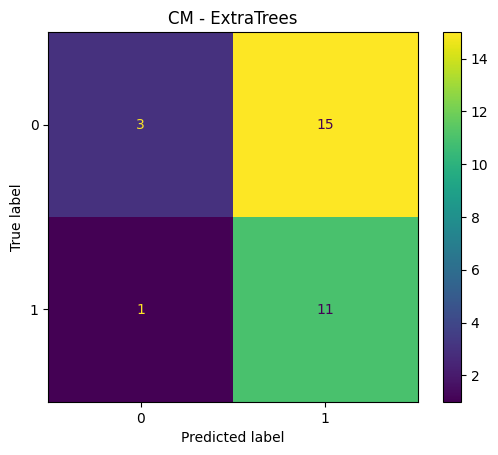

<Figure size 640x480 with 0 Axes>

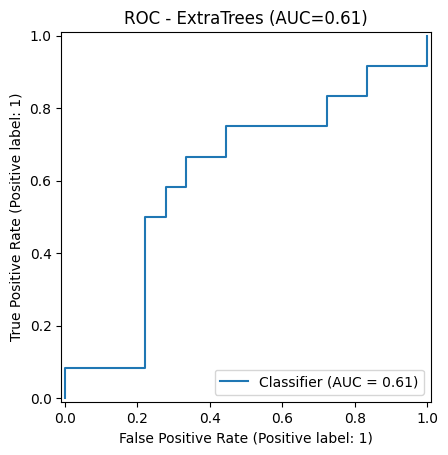

,modelo,n_feats,threshold,acc,bal_acc,auc,tn,fp,fn,tp,precision_1,recall_1,f1_1,features
0,ExtraTrees,10,0.5,0.466667,0.541667,0.606481,3,15,1,11,0.423077,0.916667,0.578947,"[retorno_3d, dist_mm_7, macd_diff, corpo_pct, ..."


In [237]:
from sklearn.ensemble import ExtraTreesClassifier

resultados = []

modelo = ExtraTreesClassifier(
    n_estimators=2000, random_state=42,
    class_weight="balanced",
    max_depth=6, min_samples_leaf=20, min_samples_split=40,
    max_features="sqrt"
)

avaliar_modelo(modelo, "ExtraTrees", df_train, df_test, features_melhores, resultados, threshold=0.5, plotar=True, importancia=False)

resumo_resultados(resultados)


In [238]:
from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier(
    n_estimators=2000, random_state=42, class_weight="balanced",
    max_depth=6, min_samples_leaf=20, min_samples_split=40, max_features="sqrt"
)

avaliar_modelo(modelo, "ExtraTrees", df_train, df_test, features_melhores, resultados, threshold=0.5, plotar=False)



===== ExtraTrees | feats=10 | th=0.5 =====
acc: 0.4667 | bal_acc: 0.5417 | auc: 0.6065
CM:
 [[ 3 15]
 [ 1 11]]
              precision    recall  f1-score   support

           0       0.75      0.17      0.27        18
           1       0.42      0.92      0.58        12

    accuracy                           0.47        30
   macro avg       0.59      0.54      0.43        30
weighted avg       0.62      0.47      0.40        30



In [239]:
from sklearn.ensemble import GradientBoostingClassifier

modelo = GradientBoostingClassifier(
    random_state=42, n_estimators=400, learning_rate=0.05, max_depth=3
)

avaliar_modelo(modelo, "GradientBoosting", df_train, df_test, features_melhores, resultados, plotar=False)



===== GradientBoosting | feats=10 | th=0.5 =====
acc: 0.3667 | bal_acc: 0.4028 | auc: 0.4444
CM:
 [[ 4 14]
 [ 5  7]]
              precision    recall  f1-score   support

           0       0.44      0.22      0.30        18
           1       0.33      0.58      0.42        12

    accuracy                           0.37        30
   macro avg       0.39      0.40      0.36        30
weighted avg       0.40      0.37      0.35        30



In [240]:
from sklearn.ensemble import HistGradientBoostingClassifier

modelo = HistGradientBoostingClassifier(
    random_state=42, max_depth=3, learning_rate=0.05, max_iter=800
)

avaliar_modelo(modelo, "HistGB", df_train, df_test, features_melhores, resultados, plotar=False)



===== HistGB | feats=10 | th=0.5 =====
acc: 0.5333 | bal_acc: 0.5417 | auc: 0.5602
CM:
 [[9 9]
 [5 7]]
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        18
           1       0.44      0.58      0.50        12

    accuracy                           0.53        30
   macro avg       0.54      0.54      0.53        30
weighted avg       0.56      0.53      0.54        30



In [241]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(
    max_iter=3000, class_weight="balanced", solver="liblinear", random_state=42
)

avaliar_modelo(modelo, "LogReg", df_train, df_test, features_melhores, resultados, threshold=0.5, plotar=False)



===== LogReg | feats=10 | th=0.5 =====
acc: 0.4 | bal_acc: 0.5 | auc: 0.6713
CM:
 [[ 0 18]
 [ 0 12]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.40      1.00      0.57        12

    accuracy                           0.40        30
   macro avg       0.20      0.50      0.29        30
weighted avg       0.16      0.40      0.23        30



In [242]:
from sklearn.svm import SVC

modelo = SVC(
    kernel="rbf", C=1.0, gamma="scale",
    class_weight="balanced", probability=True, random_state=42
)

avaliar_modelo(modelo, "SVC_RBF", df_train, df_test, features_melhores, resultados, threshold=0.5, plotar=False)



===== SVC_RBF | feats=10 | th=0.5 =====
acc: 0.4 | bal_acc: 0.5 | auc: 0.6898
CM:
 [[ 0 18]
 [ 0 12]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.40      1.00      0.57        12

    accuracy                           0.40        30
   macro avg       0.20      0.50      0.29        30
weighted avg       0.16      0.40      0.23        30



In [243]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=25, weights="distance")

avaliar_modelo(modelo, "KNN", df_train, df_test, features_melhores, resultados, threshold=0.5, plotar=False)



===== KNN | feats=10 | th=0.5 =====
acc: 0.6333 | bal_acc: 0.6528 | auc: 0.6852
CM:
 [[10  8]
 [ 3  9]]
              precision    recall  f1-score   support

           0       0.77      0.56      0.65        18
           1       0.53      0.75      0.62        12

    accuracy                           0.63        30
   macro avg       0.65      0.65      0.63        30
weighted avg       0.67      0.63      0.64        30



In [244]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()

avaliar_modelo(modelo, "GaussianNB", df_train, df_test, features_melhores, resultados, threshold=0.5, plotar=False)



===== GaussianNB | feats=10 | th=0.5 =====
acc: 0.4 | bal_acc: 0.5 | auc: 0.6713
CM:
 [[ 0 18]
 [ 0 12]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.40      1.00      0.57        12

    accuracy                           0.40        30
   macro avg       0.20      0.50      0.29        30
weighted avg       0.16      0.40      0.23        30



In [245]:
resumo_resultados(resultados)


,modelo,n_feats,threshold,acc,bal_acc,auc,tn,fp,fn,tp,precision_1,recall_1,f1_1,features
0,KNN,10,0.5,0.633333,0.652778,0.685185,10,8,3,9,0.529412,0.750000,0.620690,"[retorno_3d, dist_mm_7, macd_diff, corpo_pct, ..."
1,HistGB,10,0.5,0.533333,0.541667,0.560185,9,9,5,7,0.437500,0.583333,0.500000,"[retorno_3d, dist_mm_7, macd_diff, corpo_pct, ..."
2,ExtraTrees,10,0.5,0.466667,0.541667,0.606481,3,15,1,11,0.423077,0.916667,0.578947,"[retorno_3d, dist_mm_7, macd_diff, corpo_pct, ..."
3,ExtraTrees,10,0.5,0.466667,0.541667,0.606481,3,15,1,11,0.423077,0.916667,0.578947,"[retorno_3d, dist_mm_7, macd_diff, corpo_pct, ..."
4,SVC_RBF,10,0.5,0.400000,0.500000,0.689815,0,18,0,12,0.400000,1.000000,0.571429,"[retorno_3d, dist_mm_7, macd_diff, corpo_pct, ..."
5,LogReg,10,0.5,0.400000,0.500000,0.671296,0,18,0,12,0.400000,1.000000,0.571429,"[retorno_3d, dist_mm_7, macd_diff, corpo_pct, ..."
6,GaussianNB,10,0.5,0.400000,0.500000,0.671296,0,18,0,12,0.400000,1.000000,0.571429,"[retorno_3d, dist_mm_7, macd_diff, corpo_pct, ..."
7,GradientBoosting,10,0.5,0.366667,0.402778,0.444444,4,14,5,7,0.333333,0.583333,0.424242,"[retorno_3d, dist_mm_7, macd_diff, corpo_pct, ..."


In [246]:
proba = modelo.predict_proba(X_test)[:,1]
ths = np.arange(0.30, 0.71, 0.01)

best = (0, 0, 0)
for th in ths:
    pred = (proba >= th).astype(int)
    acc = accuracy_score(y_test, pred)
    bal = balanced_accuracy_score(y_test, pred)
    if acc > best[1]:
        best = (th, acc, bal)

print("melhor th:", round(best[0],2), "acc:", round(best[1],4), "bal_acc:", round(best[2],4))


melhor th: 0.57 acc: 0.6667 bal_acc: 0.6528


In [247]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=15, weights="distance")
avaliar_modelo(modelo, "KNN_k15_dist", df_train, df_test, features_melhores, resultados, threshold=0.57, plotar=False)



===== KNN_k15_dist | feats=10 | th=0.57 =====
acc: 0.6333 | bal_acc: 0.6389 | auc: 0.6898
CM:
 [[11  7]
 [ 4  8]]
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           1       0.53      0.67      0.59        12

    accuracy                           0.63        30
   macro avg       0.63      0.64      0.63        30
weighted avg       0.65      0.63      0.64        30



In [248]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=7, weights="distance")
avaliar_modelo(modelo, "KNN_k7_dist", df_train, df_test, features_melhores, resultados, threshold=0.57, plotar=False)



===== KNN_k7_dist | feats=10 | th=0.57 =====
acc: 0.6667 | bal_acc: 0.6667 | auc: 0.6944
CM:
 [[12  6]
 [ 4  8]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71        18
           1       0.57      0.67      0.62        12

    accuracy                           0.67        30
   macro avg       0.66      0.67      0.66        30
weighted avg       0.68      0.67      0.67        30



In [249]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=25, weights="distance")
avaliar_modelo(modelo, "KNN_k25_dist", df_train, df_test, features_melhores, resultados, threshold=0.57, plotar=False)



===== KNN_k25_dist | feats=10 | th=0.57 =====
acc: 0.6333 | bal_acc: 0.6389 | auc: 0.6852
CM:
 [[11  7]
 [ 4  8]]
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           1       0.53      0.67      0.59        12

    accuracy                           0.63        30
   macro avg       0.63      0.64      0.63        30
weighted avg       0.65      0.63      0.64        30



In [250]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

modelo = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=15, weights="distance"))
avaliar_modelo(modelo, "KNN_Scaler_k15_dist", df_train, df_test, features_melhores, resultados, threshold=0.57, plotar=False)



===== KNN_Scaler_k15_dist | feats=10 | th=0.57 =====
acc: 0.7333 | bal_acc: 0.7083 | auc: 0.7361
CM:
 [[15  3]
 [ 5  7]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.70      0.58      0.64        12

    accuracy                           0.73        30
   macro avg       0.72      0.71      0.71        30
weighted avg       0.73      0.73      0.73        30



In [251]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

modelo = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=15, weights="distance"))
modelo.fit(X_train, y_train)

proba = modelo.predict_proba(X_test)[:,1]

best = (0, 0, 0)
for th in np.arange(0.35, 0.71, 0.01):
    pred = (proba >= th).astype(int)
    acc = accuracy_score(y_test, pred)
    bal = balanced_accuracy_score(y_test, pred)
    if acc > best[1]:
        best = (th, acc, bal)

print("melhor th:", round(best[0],2), "| acc:", round(best[1],4), "| bal_acc:", round(best[2],4))


melhor th: 0.54 | acc: 0.7667 | bal_acc: 0.75


KNN_SCALER_k15_DIST | th= 0.54 | acc= 0.7667 | bal_acc= 0.75 | auc= 0.7361
CM:
 [[15  3]
 [ 4  8]]
              precision    recall  f1-score   support

           0     0.7895    0.8333    0.8108        18
           1     0.7273    0.6667    0.6957        12

    accuracy                         0.7667        30
   macro avg     0.7584    0.7500    0.7532        30
weighted avg     0.7646    0.7667    0.7647        30



<Figure size 640x480 with 0 Axes>

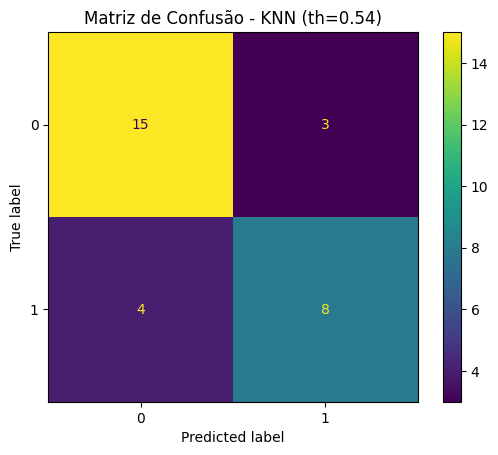

<Figure size 640x480 with 0 Axes>

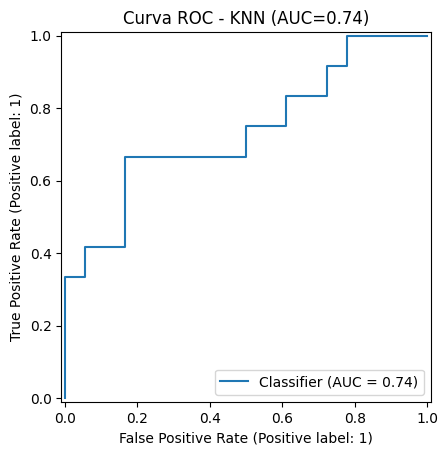

In [252]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay
)

TH = 0.54

modelo = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=15, weights="distance")
)

modelo.fit(X_train, y_train)

proba = modelo.predict_proba(X_test)[:, 1]
pred  = (proba >= TH).astype(int)

acc = accuracy_score(y_test, pred)
bal = balanced_accuracy_score(y_test, pred)
auc = roc_auc_score(y_test, proba)

print("KNN_SCALER_k15_DIST | th=", TH, "| acc=", round(acc,4), "| bal_acc=", round(bal,4), "| auc=", round(auc,4))
print("CM:\n", confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, digits=4, zero_division=0))

plt.figure()
ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels=["0","1"])
plt.title("Matriz de Confusão - KNN (th=0.54)")
plt.show()

plt.figure()
RocCurveDisplay.from_predictions(y_test, proba)
plt.title(f"Curva ROC - KNN (AUC={auc:.2f})")
plt.show()


In [257]:
# escolhe o threshold na validação, depois aplica no teste.
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, confusion_matrix, classification_report

df = df_ibovespa.sort_values("data").reset_index(drop=True).copy()

df_test = df.iloc[-30:].copy()
df_val  = df.iloc[-120:-30].copy()   # 90 dias de validação

ini_treino = df_val["data"].min() - pd.DateOffset(years=30)
df_train = df[(df["data"] >= ini_treino) & (df["data"] < df_val["data"].min())].copy()

features = features_melhores

train = df_train[features + ["tendencia"]].dropna()
val   = df_val[features + ["tendencia"]].dropna()
test  = df_test[features + ["tendencia"]].dropna()

X_train, y_train = train[features], train["tendencia"].astype(int)
X_val,   y_val   = val[features],   val["tendencia"].astype(int)
X_test,  y_test  = test[features],  test["tendencia"].astype(int)

modelo = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=15, weights="distance"))
modelo.fit(X_train, y_train)

import numpy as np
from sklearn.metrics import accuracy_score, balanced_accuracy_score

proba_val  = modelo.predict_proba(X_val)[:, 1]
proba_test = modelo.predict_proba(X_test)[:, 1]

best = (0.5, -1, -1)  # (th, bal_acc, acc)

for th in np.arange(0.35, 0.71, 0.01):
    pred_val = (proba_val >= th).astype(int)

    # trava: não aceita threshold que prevê só 0 ou só 1
    if pred_val.min() == pred_val.max():
        continue

    bal = balanced_accuracy_score(y_val, pred_val)
    acc = accuracy_score(y_val, pred_val)

    if bal > best[1]:
        best = (th, bal, acc)

th_best = best[0]
print("TH escolhido (bal_acc):", round(th_best,2), "| bal_val:", round(best[1],4), "| acc_val:", round(best[2],4))

pred_test = (proba_test >= th_best).astype(int)
print("acc_test:", round(accuracy_score(y_test, pred_test),4),
      "| bal_test:", round(balanced_accuracy_score(y_test, pred_test),4))


acc = accuracy_score(y_test, pred_test)
bal = balanced_accuracy_score(y_test, pred_test)
auc = roc_auc_score(y_test, proba_test)

print("\nTESTE:")
print("acc:", round(acc,4), "| bal_acc:", round(bal,4), "| auc:", round(auc,4))
print("CM:\n", confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test, digits=4, zero_division=0))



TH escolhido (bal_acc): 0.67 | bal_val: 0.5325 | acc_val: 0.4889
acc_test: 0.6667 | bal_test: 0.6111

TESTE:
acc: 0.6667 | bal_acc: 0.6111 | auc: 0.75
CM:
 [[16  2]
 [ 8  4]]
              precision    recall  f1-score   support

           0     0.6667    0.8889    0.7619        18
           1     0.6667    0.3333    0.4444        12

    accuracy                         0.6667        30
   macro avg     0.6667    0.6111    0.6032        30
weighted avg     0.6667    0.6667    0.6349        30



In [258]:
print("proba_val min/25/50/75/max:", np.min(proba_val), np.quantile(proba_val,0.25), np.median(proba_val), np.quantile(proba_val,0.75), np.max(proba_val))
print("proba_test min/25/50/75/max:", np.min(proba_test), np.quantile(proba_test,0.25), np.median(proba_test), np.quantile(proba_test,0.75), np.max(proba_test))


proba_val min/25/50/75/max: 0.26385688130873264 0.457813738901922 0.5274608662873241 0.6020173702191738 0.8007353228257496
proba_test min/25/50/75/max: 0.4015348080954246 0.4936667439496578 0.5460602458747892 0.6645983917708473 0.8101508195623092


In [259]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

cands = [
    ("k7_p2",  KNeighborsClassifier(n_neighbors=7,  weights="distance", p=2)),
    ("k15_p2", KNeighborsClassifier(n_neighbors=15, weights="distance", p=2)),
    ("k25_p2", KNeighborsClassifier(n_neighbors=25, weights="distance", p=2)),
    ("k7_p1",  KNeighborsClassifier(n_neighbors=7,  weights="distance", p=1)),
    ("k15_p1", KNeighborsClassifier(n_neighbors=15, weights="distance", p=1)),
    ("k25_p1", KNeighborsClassifier(n_neighbors=25, weights="distance", p=1)),
]

best = ("", -1)
for nome, knn in cands:
    m = make_pipeline(StandardScaler(), knn)
    m.fit(X_train, y_train)
    acc_val = accuracy_score(y_val, m.predict(X_val))
    if acc_val > best[1]:
        best = (nome, acc_val)

print("melhor no VAL:", best)


melhor no VAL: ('k15_p1', 0.5555555555555556)


In [260]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, confusion_matrix, classification_report

modelo = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=15, weights="distance", p=1)
)

modelo.fit(X_train, y_train)

proba = modelo.predict_proba(X_test)[:, 1]
pred  = (proba >= 0.5).astype(int)

acc = accuracy_score(y_test, pred)
bal = balanced_accuracy_score(y_test, pred)
auc = roc_auc_score(y_test, proba)

print("KNN_Scaler_k15_dist_p1 | th=0.50 | acc=", round(acc,4), "| bal_acc=", round(bal,4), "| auc=", round(auc,4))
print("CM:\n", confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, digits=4, zero_division=0))


KNN_Scaler_k15_dist_p1 | th=0.50 | acc= 0.5667 | bal_acc= 0.5972 | auc= 0.8102
CM:
 [[ 8 10]
 [ 3  9]]
              precision    recall  f1-score   support

           0     0.7273    0.4444    0.5517        18
           1     0.4737    0.7500    0.5806        12

    accuracy                         0.5667        30
   macro avg     0.6005    0.5972    0.5662        30
weighted avg     0.6258    0.5667    0.5633        30



In [261]:
ret_amanha = df_ibovespa["ultimo"].shift(-1) / df_ibovespa["ultimo"] - 1

X = 0.001  # 0,1%
df_ibovespa["tendencia2"] = np.where(ret_amanha > X, 1,
                              np.where(ret_amanha < -X, 0, np.nan))

df_model = df_ibovespa.dropna(subset=["tendencia2"]).copy()
df_model["tendencia2"] = df_model["tendencia2"].astype(int)


In [262]:
!pip -q install imbalanced-learn

from imblearn.ensemble import BalancedRandomForestClassifier

modelo = BalancedRandomForestClassifier(
    n_estimators=1500, random_state=42,
    max_depth=6, min_samples_leaf=20, min_samples_split=40,
    max_features="sqrt"
)


In [263]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

modelo = make_pipeline(
    StandardScaler(),
    LinearSVC(class_weight="balanced", random_state=42)
)


In [265]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report

# ---------------------------
# alvo de regressão: retorno de amanhã
# ---------------------------
df = df_ibovespa.sort_values("data").reset_index(drop=True).copy()
df["ret_amanha"] = df["ultimo"].shift(-1) / df["ultimo"] - 1

# teste = últimos 30 dias (com alvo disponível)
df_test = df.iloc[-31:-1].copy()   # garante que ret_amanha existe
data_ini_treino = df_test["data"].min() - pd.DateOffset(years=30)
df_train = df[(df["data"] >= data_ini_treino) & (df["data"] < df_test["data"].min())].copy()

features = features_melhores

train = df_train[features + ["ret_amanha"]].dropna()
test  = df_test[features + ["ret_amanha"]].dropna()

X_train = train[features]
y_train = train["ret_amanha"]

X_test  = test[features]
y_test_ret = test["ret_amanha"]

# ---------------------------
# modelo de regressão
# ---------------------------
modelo_reg = RandomForestRegressor(
    n_estimators=1200,
    random_state=42,
    max_depth=6,
    min_samples_leaf=20,
    min_samples_split=40,
    max_features="sqrt",
    n_jobs=-1
)
modelo_reg.fit(X_train, y_train)

# ---------------------------
# classificar pelo sinal do retorno previsto
# ---------------------------
pred_ret = modelo_reg.predict(X_test)
pred_cls = (pred_ret > 0).astype(int)

y_test_cls = (y_test_ret > 0).astype(int)

acc = accuracy_score(y_test_cls, pred_cls)
bal = balanced_accuracy_score(y_test_cls, pred_cls)

print("REG->CLS | acc:", round(acc,4), "| bal_acc:", round(bal,4))
print("CM:\n", confusion_matrix(y_test_cls, pred_cls))
print(classification_report(y_test_cls, pred_cls, digits=4, zero_division=0))



REG->CLS | acc: 0.4 | bal_acc: 0.5
CM:
 [[ 0 18]
 [ 0 12]]
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        18
           1     0.4000    1.0000    0.5714        12

    accuracy                         0.4000        30
   macro avg     0.2000    0.5000    0.2857        30
weighted avg     0.1600    0.4000    0.2286        30



In [266]:
y_test_tend = df.loc[test.index, "tendencia"].astype(int)
print("check (tendencia vs sinal ret_amanha):", (y_test_tend.values == y_test_cls.values).mean())


check (tendencia vs sinal ret_amanha): 1.0
